# PySpark Introduction


PySpark is the Python library for Apache Spark, which is a big data processing framework.

It helps you process large datasets across multiple computers (a cluster) in a parallel and fault-tolerant way.

Instead of processing data on one machine (like Pandas), Spark splits data into chunks and runs tasks simultaneously on different machines.

## What is RDD (Resilient Distributed Dataset)?

- RDD (Resilient Distributed Dataset) is the core data structure in Spark.

- It is a collection of data (like a list in Python) but stored across multiple computers (distributed).

- It is resilient (fault-tolerant), meaning if part of it is lost (because a machine fails), Spark can rebuild it automatically.

- It is immutable, meaning you cannot change it after it's created. Any modification creates a new RDD.

💡 Think of an RDD as a distributed version of a Python list that Spark can process in parallel across many computers.

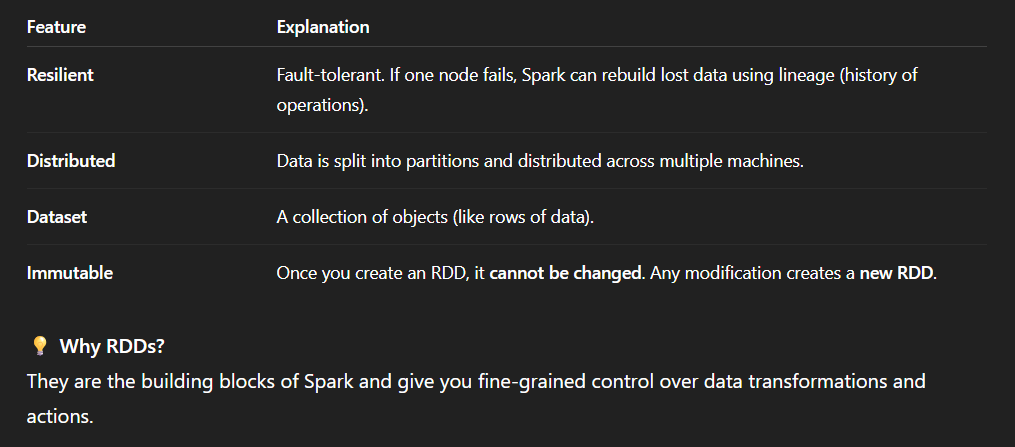

### How RDD Works

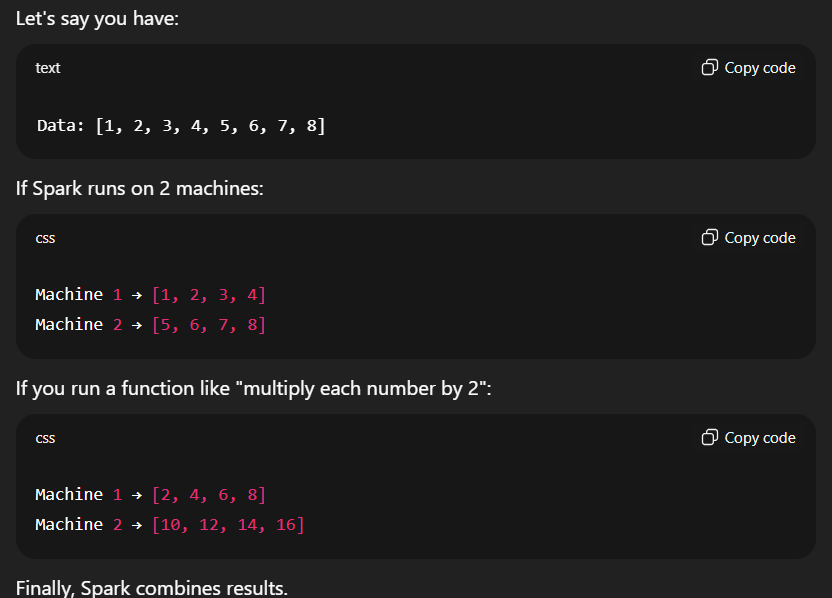

## What is Spark Session

A SparkSession is the entry point to any PySpark application. It is the main object you use to interact with Spark and perform operations like creating RDDs, DataFrames, reading data, and running queries.

Before Spark 2.0, you had to use separate objects like:

- SparkContext (for RDDs),

- SQLContext (for DataFrames),

- HiveContext (for Hive).

Now, SparkSession combines all of these into one object, making it simpler.



### Why SparkSession is important
- It creates and manages SparkContext internally.

- It is required to read data (CSV, JSON, Parquet, etc.).

- It is used to create RDDs and DataFrames.

- It provides access to SQL queries using .sql().

- It allows configuration of Spark (e.g., app name, master URL).

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("RDD Example").getOrCreate()
sc = spark.sparkContext

'''
.local[1] => run Spark locally with 1 CPU core
.appName => Name of your Spark application
.getOrCreate => Creates or reuses an existing SparkSession
'''

'\n.local[1] => run Spark locally with 1 CPU core\n.appName => Name of your Spark application\n.getOrCreate => Creates or reuses an existing SparkSession\n'

In [ ]:
spark

## How RDD is created

As discussed above, You must first create a SparkSession, which is your main entry point into Spark.



We can create rdd in three ways
- From a Text File
- From an existing Python collection
- By transforming another RDD

In [ ]:
rdd = sc.textFile("test.txt")   # Each line in the file becomes one element in the RDD
data = [1,2,3,4,5]
rdd = sc.parallelize(data)

### RDD Operations
There are two main types of operations:
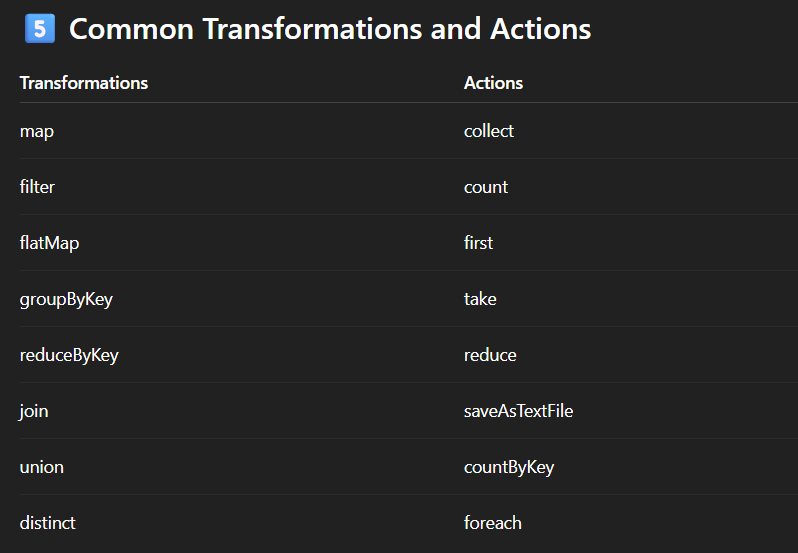

Key Points to Remember
- Lazy evaluation: Transformations are not executed until an action is called.

- Fault tolerance: Spark automatically recovers lost data.

- Parallelism: Data is split into partitions and processed in parallel.

- Immutability: Once created, RDDs cannot be modified.

## PySpark DataFrame

A DataFrame in PySpark is:

- A distributed collection of data organized into rows and columns.

- Similar to a table in a database or a Pandas DataFrame.

- Stored across multiple machines in a Spark cluster, which allows Spark to process big data in parallel.

💡 Difference from Pandas:

- Pandas DataFrame: Runs on one machine, data must fit in memory.

- PySpark DataFrame: Runs on many machines in parallel, handles huge datasets.

### Why PySpark DataFrame is Faster than Pandas

- PySpark: Uses cluster computing and parallel processing → good for large datasets.

- Pandas: Single-machine in-memory processing → better for small to medium datasets.

✅ If you have GBs or TBs of data, use PySpark.

✅ If you have MBs of data, Pandas is enough.

### Creating a DataFrame

#### Ways to create Dataframe
- Create DataFrame from RDD
       - Using toDF()
       - Using createDataFrame()
- Create DataFrame from Files
       - From CSV
       - From Text File
       - From JSON File
- Create DataFrame From Python List

Create DataFrame from Python List

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]")\
        .appName("DataFrame Example")\
        .getOrCreate()
data = [
      ('James', '', 'Smith', '1991-04-01', 'M', 3000),
      ('Michael', 'Rose', '', '2000-05-19', 'M', 4000),
      ('Robert', '', 'Williams', '1978-09-05', 'M', 4000),
      ('Maria', 'Anne', 'Jones', '1967-12-01', 'F', 4000),
      ('Jen', 'Mary', 'Brown', '1980-02-17', 'F', -1)
]
#col names
columns = ["FirstName", "MiddleName","LastName", "DOB", "Gender", "Salary"]
df = spark.createDataFrame(data = data, schema = columns)
df.show()

'''
--- Note ---
local[1] → Spark will run with 1 core (single-threaded).
local[2] → Spark will run with 2 cores.
local[*] → Spark will run with all cores available.

'''

+---------+----------+--------+----------+------+------+
|FirstName|MiddleName|LastName|       DOB|Gender|Salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



'\n--- Note ---\nlocal[1] → Spark will run with 1 core (single-threaded).\nlocal[2] → Spark will run with 2 cores.\nlocal[*] → Spark will run with all cores available.\n\n'

Check schema (column names & data types):

In [ ]:
df.printSchema()

root
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: long (nullable = true)



Create DataFrame from RDD

***Using toDF()***

If you already have an RDD, you can convert it into a DataFrame using toDF().

Note:

In PySpark, parallelize() is a method of SparkContext that is used to create an RDD (Resilient Distributed Dataset) from a Python collection (like a list).

It takes your local data and distributes it across the Spark cluster (or CPU cores if running locally), allowing parallel processing.

In [ ]:
# Create RDD
data = [("Java", "20000"), ("Python", "100000"), ("Scala", "3000")]
spark = SparkSession.builder.appName('DataFrame by RDD').getOrCreate()
rdd = spark.sparkContext.parallelize(data)
# Convert RDD to DataFrame without column names
dfFromRDD1 = rdd.toDF()
dfFromRDD1.printSchema()
dfFromRDD1.show()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)

+------+------+
|    _1|    _2|
+------+------+
|  Java| 20000|
|Python|100000|
| Scala|  3000|
+------+------+



Adding Column Names

In [ ]:
columns = ["Languages", "Users_count"]
dfFromRDD1 = rdd.toDF(columns)
dfFromRDD1.printSchema()
dfFromRDD1.show()

root
 |-- Languages: string (nullable = true)
 |-- Users_count: string (nullable = true)

+---------+-----------+
|Languages|Users_count|
+---------+-----------+
|     Java|      20000|
|   Python|     100000|
|    Scala|       3000|
+---------+-----------+



Using createDataFrame()

In [ ]:
columns = ["Languages", "users_count"]
df2 = spark.createDataFrame(rdd).toDF(*columns)
df2.show()

+---------+-----------+
|Languages|users_count|
+---------+-----------+
|     Java|      20000|
|   Python|     100000|
|    Scala|       3000|
+---------+-----------+



Create DataFrame from Files

From CSV

header=True → uses the first row as column names.

inferSchema=True → automatically detects column data types.

In [ ]:
df_csv = spark.read.csv("/content/Marks_data.csv", header = True, inferSchema=True)
df_csv.show()

+----+--------+--------+---+
|Name|M1 Score|M2 Score|age|
+----+--------+--------+---+
|Alex|      62|      80| 20|
|Brad|      45|      56| 19|
|Joey|      85|      98| 21|
|NULL|      54|      79| 20|
|abhi|    NULL|    NULL| 20|
+----+--------+--------+---+



From Text File

This creates a single column DataFrame with column name value.

In [ ]:
df_txt = spark.read.text("/content/test.txt")
df_txt.show()

+--------+
|   value|
+--------+
| Ananya |
|    Arun|
|Saveetha|
|  Vimala|
+--------+



From JSON File

Spark automatically maps JSON keys to columns.



In [ ]:
df_json = spark.read.json("/content/data.json.txt")
df_json.show()

+---+-------+
|age|   name|
+---+-------+
| 25|   Teja|
| 30|  Shiva|
| 28|Charlie|
+---+-------+



Key Features of PySpark DataFrames

- Distributed → works on multiple machines.

- Optimized → uses Spark's engine for speed.

- Schema-aware → knows column names and data types.

- Supports SQL → you can run SQL queries using df.createOrReplaceTempView() and spark.sql().


### DataFrame Operations

#### Renaming

##### Rename a Single Column

The simplest way is to use withColumnRenamed().

In [ ]:
df = df.withColumnRenamed("dob","DateOfBirth")
df.printSchema()

root
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: long (nullable = true)



##### Rename Multiple Columns


You can chain multiple withColumnRenamed() calls:

In [ ]:
df2 = df.withColumnRenamed("dob", "DateOfBirth")\
        .withColumnRenamed("Salary", "Salary_amount")
df2.printSchema()

root
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary_amount: long (nullable = true)



OR dynamically loop through a dictionary:

In [ ]:
rename_map = {"FirstName": "First_Name", "LastName":"Last_Name"}
for old_col, new_col in rename_map.items():
  df = df.withColumnRenamed(old_col, new_col)
df.printSchema()

root
 |-- First_Name: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- Last_Name: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: long (nullable = true)



##### Rename Nested Columns using withColumn()

In [ ]:
from pyspark.sql.functions import col
df_new = df.withColumn("fname", col("First_Name"))\
           .withColumn("mname", col("MiddleName"))\
           .withColumn("lname", col("Last_Name"))\
           .drop("First_Name", "MiddleName", "Last_Name")
df_new.printSchema()

root
 |-- DateOfBirth: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: long (nullable = true)
 |-- fname: string (nullable = true)
 |-- mname: string (nullable = true)
 |-- lname: string (nullable = true)



##### Rename All Columns using toDF()

If your DataFrame is flat (not nested), the easiest way is toDF():

In [ ]:
new_columns = ["First_Name", "Middle_Name", "Last_Name", "DateOfBirth", "gender", "salary"]
df_renamed = df.toDF(*new_columns)
df_renamed.printSchema()

root
 |-- First_Name: string (nullable = true)
 |-- Middle_Name: string (nullable = true)
 |-- Last_Name: string (nullable = true)
 |-- DateOfBirth: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)



#### Selecting

- select() is a transformation function in PySpark DataFrame.

- It is used to select specific columns (single, multiple, by index, or nested).

- It always returns a new DataFrame (because DataFrames in Spark are immutable).



##### Select Single or Multiple Columns

In [ ]:
#single column
df.select("FirstName").show()
#multiple colum
df.select("FirstName", "LastName").show()
#using dataframe object
df.select(df.FirstName, df.LastName).show()
#using bracket notation
df.select(df["FirstName"], df["LastName"]).show()
#using col() function
from pyspark.sql.functions import col
df.select(col("DOB"),col("Salary")).show()

+---------+
|FirstName|
+---------+
|    James|
|  Michael|
|   Robert|
|    Maria|
|      Jen|
+---------+

+---------+--------+
|FirstName|LastName|
+---------+--------+
|    James|   Smith|
|  Michael|        |
|   Robert|Williams|
|    Maria|   Jones|
|      Jen|   Brown|
+---------+--------+

+---------+--------+
|FirstName|LastName|
+---------+--------+
|    James|   Smith|
|  Michael|        |
|   Robert|Williams|
|    Maria|   Jones|
|      Jen|   Brown|
+---------+--------+

+---------+--------+
|FirstName|LastName|
+---------+--------+
|    James|   Smith|
|  Michael|        |
|   Robert|Williams|
|    Maria|   Jones|
|      Jen|   Brown|
+---------+--------+

+----------+------+
|       DOB|Salary|
+----------+------+
|1991-04-01|  3000|
|2000-05-19|  4000|
|1978-09-05|  4000|
|1967-12-01|  4000|
|1980-02-17|    -1|
+----------+------+



##### Select All Columns from a List

If you have a list of column names, you can unpack it:

In [ ]:
columns = ["FirstName", "MiddleName", "LastName", "DOB", "Gender", "Salary"]
#using list unpacking
df.select(*columns).show()
#using list comprehension
df.select([col for col in df.columns]).show()
#select all col
df.select("*").show()

+---------+----------+--------+----------+------+------+
|FirstName|MiddleName|LastName|       DOB|Gender|Salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+

+---------+----------+--------+----------+------+------+
|FirstName|MiddleName|LastName|       DOB|Gender|Salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------

##### Select Columns by Index

In [ ]:
# Select first 3 columns
df.select(df.columns[:3]).show(3)
# Select columns 2 to 4
df.select(df.columns[2:4]).show(3)

+---------+----------+--------+
|FirstName|MiddleName|LastName|
+---------+----------+--------+
|    James|          |   Smith|
|  Michael|      Rose|        |
|   Robert|          |Williams|
+---------+----------+--------+
only showing top 3 rows

+--------+----------+
|LastName|       DOB|
+--------+----------+
|   Smith|1991-04-01|
|        |2000-05-19|
|Williams|1978-09-05|
+--------+----------+
only showing top 3 rows



#### Filtering

- filter() is used to filter rows in a DataFrame based on a condition.

- It is similar to the SQL WHERE clause.

- filter() and where() are interchangeable.

- Returns a new DataFrame without modifying the original.

Syntax

```
df.filter(condition)
df.where(condition) #same as filter
```

condition can be:

- A column expression

- A SQL expression (string)

- A function like startswith(), like(), isin(), etc.






In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('DataFrame Created For Filtering.com').getOrCreate()

# Data as nested lists
data = [
    [["James","","Smith"], ["Java","Scala","C++"], "OH", "M"],
    [["Anna","Rose",""], ["Spark","Java","C++"], "NY", "F"],
    [["Julia","","Williams"], ["CSharp","VB"], "OH", "F"],
    [["Maria","Anne","Jones"], ["CSharp","VB"], "NY", "M"],
    [["Jen","Mary","Brown"], ["CSharp","VB"], "NY", "M"],
    [["Mike","Mary","Williams"], ["Python","VB"], "OH", "M"]
]

# Column names
columns = ["name", "languages", "state", "gender"]

# Create DataFrame without schema
df = spark.createDataFrame(data, columns)
df.show(truncate=False)
df.printSchema()


+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|[James, , Smith]      |[Java, Scala, C++]|OH   |M     |
|[Anna, Rose, ]        |[Spark, Java, C++]|NY   |F     |
|[Julia, , Williams]   |[CSharp, VB]      |OH   |F     |
|[Maria, Anne, Jones]  |[CSharp, VB]      |NY   |M     |
|[Jen, Mary, Brown]    |[CSharp, VB]      |NY   |M     |
|[Mike, Mary, Williams]|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+

root
 |-- name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)



##### Filter using equal condition

In [ ]:
#filter example
df.filter(df.state == "OH").show()
#where example
df.where(df.state == "NY").show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



##### Filter using not equal

In [ ]:
#Using != operator
df.filter(df.state != "OH").show()
#Using ~ (Negation) operator
df.where(~(df.state == "NY")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



##### Filter using col()

In [ ]:
from pyspark.sql.functions import col
df.filter(col("state") == "NY").show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



##### Filter using SQL expression

Note

In PySpark, <> is just another way of writing "not equal to", just like !=.

In [ ]:
df.filter("gender == 'M'").show()
df.filter("state != 'NY'").show()
df.filter("gender <> 'M'").show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+-------------------+------------------+-----+------+
|               name|         languages|state|gender|
+-------------------+------------------+-----+------+
|     [Anna

##### Filter using multiple conditions

In [ ]:
# And condition
df.filter((df.state == "OH")&(df.gender == "M")).show()
# Or condition
df.filter((df.state =="NY")|(df.gender == "F")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



##### Filter using list values

In [ ]:
li = ["OH", "CA", "NY"]
#isin
df.filter(df.state.isin(li)).show()

#not isin
df.filter(~df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+----+---------+-----+------+
|name|languages|state|gender|
+----+---------+-----+------+
+----+---------+-----+------+



##### Filter using string functions

In [ ]:
# startswith
df.where(df.state.startswith("N")).show()
# endswith
df.where(df.state.endswith("H")).show()
# contains
df.where(df.state.contains("Y")).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria, Anne, Jones]|      [CSharp, VB]|   NY|     M|
|  [Jen, Mary, Brown]|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
| [Julia, , Williams]|      [CSharp, VB]|   OH|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Maria,

##### Filter using array column

In [ ]:
from pyspark.sql.functions import array_contains
# array_contains
df.filter(array_contains(df.languages,"Java")).show()
# not array_contains
df.filter(~array_contains(df.languages,"CSharp")).show()

+----------------+------------------+-----+------+
|            name|         languages|state|gender|
+----------------+------------------+-----+------+
|[James, , Smith]|[Java, Scala, C++]|   OH|     M|
|  [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
+----------------+------------------+-----+------+

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    [James, , Smith]|[Java, Scala, C++]|   OH|     M|
|      [Anna, Rose, ]|[Spark, Java, C++]|   NY|     F|
|[Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



#### Dropping

In [ ]:
from os import truncate
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("Dropping Example").getOrCreate()
simpleData = [
    ("James", "", "Smith", "36636", "NewYork", 3100),
    ("Michael", "Rose", "", "40288", "California", 4300),
    ("Robert", "", "Williams", "42114", "Florida", 1400),
    ("Maria", "Anne", "Jones", "39192", "Florida", 5500),
    ("Jen", "Mary", "Brown", "34561", "NewYork", 3000)
]
columns  = ["firstname", "middlename", "lastname", "id","location", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate= False)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+-----+----------+------+
|firstname|middlename|lastname|id   |location  |salary|
+---------+----------+--------+-----+----------+------+
|James    |          |Smith   |36636|NewYork   |3100  |
|Michael  |Rose      |        |40288|California|4300  |
|Robert   |          |Williams|42114|Florida   |1400  |
|Maria    |Anne      |Jones   |39192|Florida   |5500  |
|Jen      |Mary      |Brown   |34561|NewYork   |3000  |
+---------+----------+--------+-----+----------+------+



##### Drop a Single Column

We can drop column in three ways
- String-based: "firstname"

- Column object: col("firstname")

- DataFrame column object: df.firstname

In [ ]:
df.drop("firstname").printSchema()
df.drop(col("firstname")).printSchema()
df.drop(df.firstname).printSchema()

root
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- salary: long (nullable = true)

root
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- salary: long (nullable = true)

root
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- salary: long (nullable = true)



##### Drop Multiple Columns

We can drop column in two ways
- Pass multiple arguments
- Pass a tuple or list with *

In [ ]:
# method 1: Pass multiple arguments
df.drop("firstname","middlename" ,"lastname").printSchema()
# method 2: Pass a tuple or list with *
cols = ("id", "location")
df.drop(*cols).printSchema()

root
 |-- id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- salary: long (nullable = true)

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- salary: long (nullable = true)



##### Drop Rows

Creating Dataframe for demonstration

In [ ]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('sparkdf').getOrCreate()

data = [["1", None, "company 1"],
        ["2", "ojaswi", "company 2"],
        [None, "bobby", "company 3"],
        ["1", "sravan", "company 1"],
        ["2", "ojaswi", None],
        [None, "rohith", "company 2"],
        ["5", "gnanesh", "company 1"],
        ["2", None, "company 2"],
        ["3", "bobby", "company 3"],
        ["4", "rohith", None]]

columns = ['Employee_ID', 'Employee_NAME', 'Company_Name']

df = spark.createDataFrame(data, columns)

df.show()

+-----------+-------------+------------+
|Employee_ID|Employee_NAME|Company_Name|
+-----------+-------------+------------+
|          1|         NULL|   company 1|
|          2|       ojaswi|   company 2|
|       NULL|        bobby|   company 3|
|          1|       sravan|   company 1|
|          2|       ojaswi|        NULL|
|       NULL|       rohith|   company 2|
|          5|      gnanesh|   company 1|
|          2|         NULL|   company 2|
|          3|        bobby|   company 3|
|          4|       rohith|        NULL|
+-----------+-------------+------------+



###### Drop Rows with Null or Missing Values

1) Using dropna() Method

The dropna() method is used to remove rows that contain any null (missing) values in the DataFrame. It’s handy for quick cleanup when you want to keep only fully complete records

In [ ]:
df_clean = df.dropna()
df_clean.show()

+-----------+-------------+------------+
|Employee_ID|Employee_NAME|Company_Name|
+-----------+-------------+------------+
|          2|       ojaswi|   company 2|
|          1|       sravan|   company 1|
|          5|      gnanesh|   company 1|
|          3|        bobby|   company 3|
+-----------+-------------+------------+



2) Using isNotNull() Method

In [ ]:
df.where(df.Employee_ID.isNotNull()).show()

+-----------+-------------+------------+
|Employee_ID|Employee_NAME|Company_Name|
+-----------+-------------+------------+
|          1|         NULL|   company 1|
|          2|       ojaswi|   company 2|
|          1|       sravan|   company 1|
|          2|       ojaswi|        NULL|
|          5|      gnanesh|   company 1|
|          2|         NULL|   company 2|
|          3|        bobby|   company 3|
|          4|       rohith|        NULL|
+-----------+-------------+------------+



###### Drop duplicate rows

Duplicate rows mean rows are the same among the dataframe, we are going to remove those rows by using dropDuplicates() function.

1) dropDuplicates()

In [ ]:
import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('sparkdf').getOrCreate()

data = [["1", "sravan", "company 1"],
        ["2", "ojaswi", "company 2"],
        ["3", "bobby", "company 3"],
        ["1", "sravan", "company 1"],
        ["2", "ojaswi", "company 2"],
        ["6", "rohith", "company 2"],
        ["5", "gnanesh", "company 1"],
        ["2", "ojaswi", "company 2"],
        ["3", "bobby", "company 3"],
        ["4", "rohith", "company 2"]]

columns = ['ID', 'Employee_NAME', 'Company_Name']

df = spark.createDataFrame(data, columns)
df.show()

df.dropDuplicates().show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  1|       sravan|   company 1|
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
|  1|       sravan|   company 1|
|  2|       ojaswi|   company 2|
|  6|       rohith|   company 2|
|  5|      gnanesh|   company 1|
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
|  4|       rohith|   company 2|
+---+-------------+------------+

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  2|       ojaswi|   company 2|
|  1|       sravan|   company 1|
|  3|        bobby|   company 3|
|  4|       rohith|   company 2|
|  6|       rohith|   company 2|
|  5|      gnanesh|   company 1|
+---+-------------+------------+



2)  Drop duplicates based on the column name.

In [ ]:
df.dropDuplicates(['Employee_Name']).show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  3|        bobby|   company 3|
|  5|      gnanesh|   company 1|
|  2|       ojaswi|   company 2|
|  6|       rohith|   company 2|
|  1|       sravan|   company 1|
+---+-------------+------------+



###### Remove duplicate rows by using a distinct function

In [ ]:
df.distinct().show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  2|       ojaswi|   company 2|
|  1|       sravan|   company 1|
|  3|        bobby|   company 3|
|  4|       rohith|   company 2|
|  6|       rohith|   company 2|
|  5|      gnanesh|   company 1|
+---+-------------+------------+



###### Dropping Rows with Condition

1) Using Where condition

In [ ]:
from pyspark.sql.functions import col
df.where(col("ID").cast("int")>4).show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  6|       rohith|   company 2|
|  5|      gnanesh|   company 1|
+---+-------------+------------+



In [ ]:
df.where(col("Company_Name") != 'company 1').show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
|  2|       ojaswi|   company 2|
|  6|       rohith|   company 2|
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
|  4|       rohith|   company 2|
+---+-------------+------------+



2) Using Filter() Condition

In [ ]:
df.filter(df.ID != 4).show()

+---+-------------+------------+
| ID|Employee_NAME|Company_Name|
+---+-------------+------------+
|  1|       sravan|   company 1|
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
|  1|       sravan|   company 1|
|  2|       ojaswi|   company 2|
|  6|       rohith|   company 2|
|  5|      gnanesh|   company 1|
|  2|       ojaswi|   company 2|
|  3|        bobby|   company 3|
+---+-------------+------------+



#### Sorting

Sorting in PySpark allows you to rearrange rows of a DataFrame based on one or multiple columns in ascending or descending order.

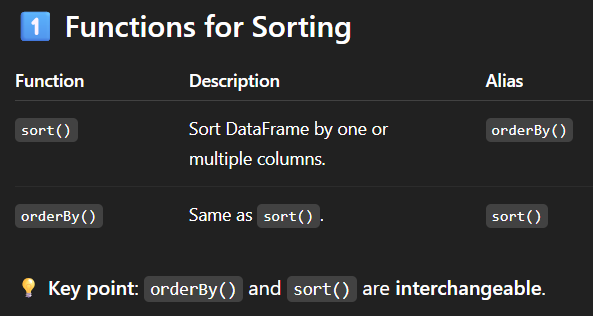

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
from google.colab import drive
spark = SparkSession.builder.master("local[1]").appName("Sorting Example").getOrCreate()
sc = spark.sparkContext
drive.mount('/content/drive')
df = spark.read.csv('/content/drive/My Drive/case_study_dataset/college_student_placement_dataset.csv', header= True, inferSchema=True)
df.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+----------+---+---------------+-----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result| CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+-----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0030|107|           6.61| 6.28|                   8|                   No|                     8|                   8|                 4|       No|
|   CLG0061| 97|           5.52| 5.37|                   8|                   No|                     7|                   8|                 0|       No|
|   CLG0036|109|           5.36| 5.83|                   9|                   No|               

a) Sort by Single Column (Ascending by default)

In [ ]:
df.sort("CGPA").show()
df.orderBy("Extra_Curricular_Score").show()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0044|113|           5.03|4.54|                   6|                  Yes|                     9|                   5|                 4|       No|
|   CLG0017| 99|           5.01|4.56|                   5|                  Yes|                     0|                   9|                 4|       No|
|   CLG0025| 97|           5.06|4.57|                   6|                   No|                     7|                   5|                 2|       No|
|   CLG0005|123|           5.02|4.58|                   3|                  

 b) Sort by Multiple Columns

In [ ]:
from pyspark.sql.functions import col
df.sort("Prev_Sem_Result","CGPA").show()
df.orderBy(col("Academic_Performance"), col("Projects_Completed")).show()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0069|105|            5.0|4.61|                   8|                   No|                     7|                   3|                 1|       No|
|   CLG0076| 73|            5.0|4.62|                   9|                   No|                     1|                   6|                 4|       No|
|   CLG0004| 88|            5.0|4.69|                   3|                   No|                     0|                   2|                 0|       No|
|   CLG0038|108|            5.0| 4.7|                   6|                  

c) Ascending & Descending Combination

In [ ]:
from pyspark.sql.functions import col
df.sort(col("Prev_Sem_Result").asc(), col("CGPA").desc()).show()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0036|118|            5.0|5.41|                   2|                   No|                     9|                   5|                 1|       No|
|   CLG0046| 92|            5.0|4.95|                   4|                  Yes|                     1|                   5|                 5|       No|
|   CLG0097|117|            5.0|4.87|                   3|                  Yes|                     8|                   6|                 1|       No|
|   CLG0088| 73|            5.0|4.86|                   8|                  

d) Explicit Ascending & Descending

In [ ]:
df.orderBy(col("CGPA").asc(), col("Academic_Performance").asc()).show()
df.orderBy(col("CGPA").desc(), col("Academic_Performance").desc()).show()
df.orderBy(col("Academic_Performance").desc()).show()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0044|113|           5.03|4.54|                   6|                  Yes|                     9|                   5|                 4|       No|
|   CLG0017| 99|           5.01|4.56|                   5|                  Yes|                     0|                   9|                 4|       No|
|   CLG0025| 97|           5.06|4.57|                   6|                   No|                     7|                   5|                 2|       No|
|   CLG0005|123|           5.02|4.58|                   3|                  

Note

Spark sorts strictly in the order of columns provided.

First column (here CGPA) takes full precedence.

Second column (Academic_Performance) is only used for tie-breaking when the first column has duplicate values.

If every row has a unique CGPA (or very few duplicates), you'll never see Academic_Performance influence the result.

This is expected behavior, not a bug.

e) Sorting with Null Handling

In PySpark, asc_nulls_first, asc_nulls_last, desc_nulls_first, and desc_nulls_last are used to control how NULL values are handled during sorting.

Normally, when you sort a column:

- In ascending order, NULL values appear first by default.

- In descending order, NULL values appear last by default.

These functions give you explicit control over this behavior.

1) asc_nulls_first(column)

Sorts the column in ascending order and puts NULL values at the top.

2) asc_nulls_last(column)

Sorts the column in ascending order but puts NULL values at the bottom.

3) desc_nulls_first(column)

Sorts the column in descending order and puts NULL values at the top.

4) desc_nulls_last(column)

Sorts the column in descending order but puts NULL values at the bottom.

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
from google.colab import drive
spark = SparkSession.builder.master("local[1]").appName("Sorting Example").getOrCreate()
sc = spark.sparkContext
drive.mount('/content/drive')
df = spark.read.csv('/content/drive/My Drive/case_study_dataset/LoanData.csv', header= True, inferSchema=True)
df.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|

In [ ]:
from pyspark.sql.functions import asc_nulls_first, asc_nulls_last, desc_nulls_first, desc_nulls_last
df.orderBy(asc_nulls_first("Credit_History")).show() # Ascending, nulls at top
df.orderBy(desc_nulls_last("Credit_History")).show() # Descending, nulls at bottom

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001405|  Male|    Yes|         1|    Graduate|           No|           2214|           1398.0|        85|             360|          NULL|        Urban|          Y|
|LP002178|  Male|    Yes|         0|    Graduate|           No|           3013|           3033.0|        95|             300|          NULL|        Urban|          Y|
|LP001443|Female|     No|         0|    Graduate|           No|           3692|              0.0|        93|             360|          NULL|        Rural|          Y

Interview/Discussion Points

- sort() and orderBy() are aliases.

- Sorting is stable (order is preserved for equal values in Spark ≥ 3.2).

- For different sorting orders on different columns, use ascending=[True, False].

- Use .asc(), .desc() for explicit ordering.

- Use asc_nulls_first() or desc_nulls_last() for null-handling.

- SQL equivalent uses ORDER BY.

- Sorting is an expensive operation because it requires shuffling data across partitions.


#### Aggregate Functions

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
from google.colab import drive
spark = SparkSession.builder.master("local[1]").appName("Sorting Example").getOrCreate()
sc = spark.sparkContext
drive.mount('/content/drive')
df = spark.read.csv('/content/drive/My Drive/case_study_dataset/salary.csv', header= True, inferSchema=True)
df.show(30, truncate = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+------+---+----+----------+------+
|name  |id |age |department|salary|
+------+---+----+----------+------+
|user1 |1  |25  |Jr manager|98000 |
|user2 |2  |30  |sr manager|100000|
|user3 |6  |35  |sr manager|100000|
|user4 |4  |32  |head      |70000 |
|user5 |1  |45  |Jr manager|60000 |
|user6 |6  |47  |head2     |45000 |
|user7 |5  |21  |worker    |25000 |
|user8 |1  |22  |Jr manager|50000 |
|user9 |10 |54  |lead      |45000 |
|user10|59 |52  |lead2     |50000 |
|user11|6  |25  |head2     |50000 |
|user12|2  |27  |sr manager|70000 |
|user13|59 |54  |lead2     |45000 |
|user14|2  |25  |sr manager|70000 |
|user15|1  |32  |Jr manager|50000 |
|user16|3  |37  |worker    |25000 |
|user17|74 |63  |Manager   |68000 |
|user18|7  |25  |head      |45000 |
|user19|10 |32  |lvl2 head |52000 |
|user20|10 |32  |lvl2 head |52000 |
|user21|12 |None|None      |None  |
|user22

- count(): This will return the count of rows for each group.
- mean(): This will return the mean of values for each group.
- min(): This will return the minimum of values for each group.
- sum(): This will return the total values for each group.
- avg(): This will return the average for values for each group.
- groupby() - This function groups the data by one or more columns and then applies an aggregate function to each group.

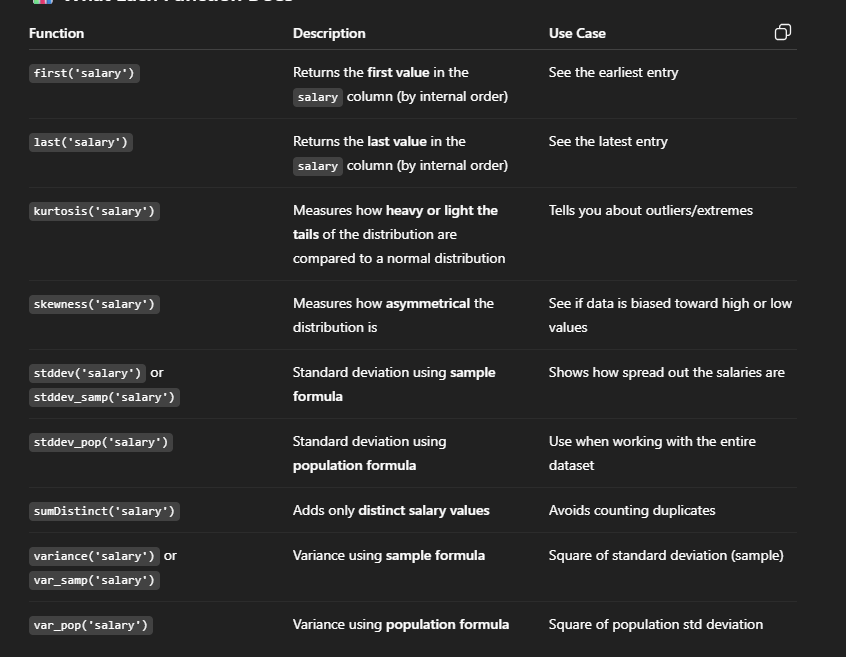

Example 1: Multiple aggregations on DEPT column with salary column

In [ ]:
from pyspark.sql import functions
df.groupby('department').agg(functions.min('salary'),
                       functions.max('salary'),
                       functions.sum('salary'),
                       functions.mean('salary'),
                       functions.count('salary'),
                       functions.avg('salary'),
                       functions.first('salary'),
                       functions.last('salary'),
                       functions.kurtosis('salary'),
                       functions.skewness('salary'),
                       functions.stddev('salary'),
                       functions.stddev_pop('salary'),
                       functions.stddev_samp('salary'),
                       functions.sumDistinct('salary'),
                       functions.variance('salary'),
                       functions.var_samp('salary'),
                       functions.var_pop('salary'),).show()

/usr/local/lib/python3.11/dist-packages/pyspark/sql/functions.py:988: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+----------+-----------+-----------+-----------+------------------+-------------+------------------+-------------+------------+-------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+
|department|min(salary)|max(salary)|sum(salary)|       avg(salary)|count(salary)|       avg(salary)|first(salary)|last(salary)|   kurtosis(salary)|  skewness(salary)|    stddev(salary)|stddev_pop(salary)|stddev_samp(salary)|sum(DISTINCT salary)|   var_samp(salary)|   var_samp(salary)|     var_pop(salary)|
+----------+-----------+-----------+-----------+------------------+-------------+------------------+-------------+------------+-------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+
|Jr manager|      50000|      98000|   258000.0|           64500.0|            

Example 2: Multiple aggregation in grouping dept and name column

In [ ]:
from pyspark.sql import functions
df.groupby('department', 'age').agg(functions.min('salary'),
                       functions.max('salary'),
                       functions.sum('salary'),
                       functions.mean('salary'),
                       functions.count('salary'),
                       functions.avg('salary')).show()

+----------+----+-----------+-----------+-----------+-----------+-------------+-----------+
|department| age|min(salary)|max(salary)|sum(salary)|avg(salary)|count(salary)|avg(salary)|
+----------+----+-----------+-----------+-----------+-----------+-------------+-----------+
|Jr manager|  22|      50000|      50000|    50000.0|    50000.0|            1|    50000.0|
|Jr manager|  25|      98000|      98000|    98000.0|    98000.0|            1|    98000.0|
|Jr manager|  32|      50000|      50000|    50000.0|    50000.0|            1|    50000.0|
|Jr manager|  45|      60000|      60000|    60000.0|    60000.0|            1|    60000.0|
|   Manager|  63|      68000|      68000|    68000.0|    68000.0|            1|    68000.0|
|      None|  24|      12000|      12000|    12000.0|    12000.0|            1|    12000.0|
|      None|None|      12000|       None|   152000.0|    76000.0|            3|    76000.0|
|      head|  25|      45000|      45000|    45000.0|    45000.0|            1| 

Another way of doing aggregations

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]


df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

df.select(collect_list("salary")).show(truncate=False)

df.select(collect_set("salary")).show(truncate=False)

df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department &amp; Salary: "+str(df2.collect()[0][0]))

print("count: "+str(df.select(count("salary")).collect()[0]))
df.select(first("salary")).show(truncate=False)
df.select(last("salary")).show(truncate=False)
df.select(kurtosis("salary")).show(truncate=False)
df.select(max("salary")).show(truncate=False)
df.select(min("salary")).show(truncate=False)
df.select(mean("salary")).show(truncate=False)
df.select(skewness("salary")).show(truncate=False)
df.select(stddev("salary"), stddev_samp("salary"), \
    stddev_pop("salary")).show(truncate=False)
df.select(sum("salary")).show(truncate=False)
df.select(sumDistinct("salary")).show(truncate=False)
df.select(variance("salary"),var_samp("salary"),var_pop("salary")) \
  .show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

approx_count_distinct: 6
avg: 3400.0
+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+

+------------------------------------+
|c

## Group By

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions
spark = SparkSession.builder \
                    .appName('Group By examples') \
                    .getOrCreate()
data = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NV",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","DE",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","NV",80000,25,18000),
    ("Kumar","Marketing","NJ",91000,50,21000)
  ]
schema = ['employee_name', "department", "state", "salary", "age", "bonus"]
df = spark.createDataFrame(data = data, schema = schema)
df.printSchema()
df.show(truncate = False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NV   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |DE   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |NV   |80000 |25 |18000|
|Kumar        |Marketing |NJ   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



### groupBy() with aggregation

Group data based on one or more columns, then apply aggregation functions like sum(), avg(), max() etc.

In [ ]:
df.groupBy("state").sum("salary").show()

+-----+-----------+
|state|sum(salary)|
+-----+-----------+
|   NV|     166000|
|   CA|     171000|
|   NY|     252000|
|   NJ|      91000|
|   DE|      99000|
+-----+-----------+



### .agg() — Multiple or custom aggregations

Use .agg() to apply one or more aggregations and give custom names using .alias().

In [ ]:
dfgroup = df.groupBy("state").agg(functions.sum("salary").alias("sum_salary"))
dfgroup.show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NV|    166000|
|   CA|    171000|
|   NY|    252000|
|   NJ|     91000|
|   DE|     99000|
+-----+----------+



### .filter() — Filter rows after aggregation

Filters results after aggregation, based on the aggregated value

In [ ]:
df_filter = dfgroup.filter(dfgroup.sum_salary >100000)
df_filter.show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NV|    166000|
|   CA|    171000|
|   NY|    252000|
+-----+----------+



### .sort() — Sorting data

Sort results in ascending or descending order.

In [ ]:
df_filter.sort("sum_salary").show()
df_filter.sort(functions.desc("sum_salary")).show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NV|    166000|
|   CA|    171000|
|   NY|    252000|
+-----+----------+

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



## Joins

In [ ]:
#first dataframe
d1 = [["1", "sravan", "company 1"],
        ["2", "ojaswi", "company 1"],
        ["3", "rohith", "company 2"],
        ["4", "sridevi", "company 1"],
        ["5", "bobby", "company 1"]]
cols = ['id', 'Name', 'Company']
df1 = spark.createDataFrame(d1, cols)
df1.show()
#second dataframe
d2 = [("1", "45000", "IT"),
      ("2", "145000", "Manager"),
      ("6", "45000", "HR"),
      ("5", "34000", "Sales")]
cols2 = ['id', 'salary', 'department']
df2 = spark.createDataFrame(d2, cols2)
df2.show()

+---+-------+---------+
| id|   Name|  Company|
+---+-------+---------+
|  1| sravan|company 1|
|  2| ojaswi|company 1|
|  3| rohith|company 2|
|  4|sridevi|company 1|
|  5|  bobby|company 1|
+---+-------+---------+

+---+------+----------+
| id|salary|department|
+---+------+----------+
|  1| 45000|        IT|
|  2|145000|   Manager|
|  6| 45000|        HR|
|  5| 34000|     Sales|
+---+------+----------+



### Inner join

This will join the two PySpark dataframes on key columns, which are common in both dataframes.

Syntax


```
dataframe1.join(dataframe2,dataframe1.column_name == dataframe2.column_name,"inner")
```



In [ ]:
df1.join(df2, df1.id == df2.id, "inner").show()

+---+------+---------+---+------+----------+
| id|  Name|  Company| id|salary|department|
+---+------+---------+---+------+----------+
|  1|sravan|company 1|  1| 45000|        IT|
|  2|ojaswi|company 1|  2|145000|   Manager|
|  5| bobby|company 1|  5| 34000|     Sales|
+---+------+---------+---+------+----------+



### Full Outer Join

This join joins the two dataframes with all matching and non-matching rows, we can perform this join in three ways.

Syntax



```
outer: dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"outer")

full: dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"full")

fullouter: dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"fullouter")
```



Example 1: Using outer keyword

In [ ]:
df1.join(df2, df1.id == df2.id, "outer").show()

+----+-------+---------+----+------+----------+
|  id|   Name|  Company|  id|salary|department|
+----+-------+---------+----+------+----------+
|   1| sravan|company 1|   1| 45000|        IT|
|   2| ojaswi|company 1|   2|145000|   Manager|
|   3| rohith|company 2|NULL|  NULL|      NULL|
|   4|sridevi|company 1|NULL|  NULL|      NULL|
|   5|  bobby|company 1|   5| 34000|     Sales|
|NULL|   NULL|     NULL|   6| 45000|        HR|
+----+-------+---------+----+------+----------+



Example 2: Using full keyword

In [ ]:
df1.join(df2, df1.id == df2.id, "full").show()

+----+-------+---------+----+------+----------+
|  id|   Name|  Company|  id|salary|department|
+----+-------+---------+----+------+----------+
|   1| sravan|company 1|   1| 45000|        IT|
|   2| ojaswi|company 1|   2|145000|   Manager|
|   3| rohith|company 2|NULL|  NULL|      NULL|
|   4|sridevi|company 1|NULL|  NULL|      NULL|
|   5|  bobby|company 1|   5| 34000|     Sales|
|NULL|   NULL|     NULL|   6| 45000|        HR|
+----+-------+---------+----+------+----------+



Example 3: Using fullouter keyword

In [ ]:
df1.join(df2, df1.id == df2.id, "fullouter").show()

+----+-------+---------+----+------+----------+
|  id|   Name|  Company|  id|salary|department|
+----+-------+---------+----+------+----------+
|   1| sravan|company 1|   1| 45000|        IT|
|   2| ojaswi|company 1|   2|145000|   Manager|
|   3| rohith|company 2|NULL|  NULL|      NULL|
|   4|sridevi|company 1|NULL|  NULL|      NULL|
|   5|  bobby|company 1|   5| 34000|     Sales|
|NULL|   NULL|     NULL|   6| 45000|        HR|
+----+-------+---------+----+------+----------+



### Left Join

- Returns all rows from the left DataFrame and the matched rows from the right DataFrame.

- If no match is found in the right DataFrame, NULL values will be returned for the right DataFrame columns.

syntax


```
df1.join(df2, df1.ID == df2.ID, "left")
df1.join(df2, df1.ID == df2.ID, "leftouter")  # same as left

```



Example 1: Perform left join

In [ ]:
df1.join(df2, df1.id == df2.id, "left").show()

+---+-------+---------+----+------+----------+
| id|   Name|  Company|  id|salary|department|
+---+-------+---------+----+------+----------+
|  1| sravan|company 1|   1| 45000|        IT|
|  2| ojaswi|company 1|   2|145000|   Manager|
|  3| rohith|company 2|NULL|  NULL|      NULL|
|  5|  bobby|company 1|   5| 34000|     Sales|
|  4|sridevi|company 1|NULL|  NULL|      NULL|
+---+-------+---------+----+------+----------+



Example 2: Perform leftouter join

In [ ]:
df1.join(df2, df1.id == df2.id, "leftouter").show()

+---+-------+---------+----+------+----------+
| id|   Name|  Company|  id|salary|department|
+---+-------+---------+----+------+----------+
|  1| sravan|company 1|   1| 45000|        IT|
|  2| ojaswi|company 1|   2|145000|   Manager|
|  3| rohith|company 2|NULL|  NULL|      NULL|
|  5|  bobby|company 1|   5| 34000|     Sales|
|  4|sridevi|company 1|NULL|  NULL|      NULL|
+---+-------+---------+----+------+----------+



### Right Join

- Returns all rows from the right DataFrame and the matched rows from the left DataFrame.

- If no match is found in the left DataFrame, NULL values will be returned for the left DataFrame columns.

Syntax


```
right: dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"right")

rightouter: dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"rightouter")
```



Example 1: Perform right join

In [ ]:
df1.join(df2, df1.id == df2.id, "right").show()

+----+------+---------+---+------+----------+
|  id|  Name|  Company| id|salary|department|
+----+------+---------+---+------+----------+
|   1|sravan|company 1|  1| 45000|        IT|
|   2|ojaswi|company 1|  2|145000|   Manager|
|   5| bobby|company 1|  5| 34000|     Sales|
|NULL|  NULL|     NULL|  6| 45000|        HR|
+----+------+---------+---+------+----------+



Example 2: Perform rightouter join

In [ ]:
df1.join(df2, df1.id == df2.id, "rightouter").show()

+----+------+---------+---+------+----------+
|  id|  Name|  Company| id|salary|department|
+----+------+---------+---+------+----------+
|   1|sravan|company 1|  1| 45000|        IT|
|   2|ojaswi|company 1|  2|145000|   Manager|
|   5| bobby|company 1|  5| 34000|     Sales|
|NULL|  NULL|     NULL|  6| 45000|        HR|
+----+------+---------+---+------+----------+



Leftsemi join

- Returns only the rows from the left DataFrame that have a matching key in the right DataFrame.

- Unlike left join, it does not return any columns from the right DataFrame.

Syntax


```
dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"leftsemi")
```




In [ ]:
df1.join(df2, df1.id == df2.id, "leftsemi").show()

+---+------+---------+
| id|  Name|  Company|
+---+------+---------+
|  1|sravan|company 1|
|  2|ojaswi|company 1|
|  5| bobby|company 1|
+---+------+---------+



### LeftAnti join
- Returns only the rows from the left DataFrame that do NOT have a match in the right DataFrame.

- It's like filtering out all matches and keeping only the unmatched records.

Syntax


```
dataframe1.join(dataframe2,dataframe1.column_name ==  dataframe2.column_name,"leftanti")
```




In [ ]:
df1.join(df2, df1.id == df2.id, "leftanti").show()

+---+-------+---------+
| id|   Name|  Company|
+---+-------+---------+
|  3| rohith|company 2|
|  4|sridevi|company 1|
+---+-------+---------+



## Handling Null Values In Pyspark

Handling missing values (NULL/NA) is one of the most critical steps in data preprocessing. PySpark provides multiple tools to detect, drop, or fill missing values efficiently, especially for big data.

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("NullValuesExample").getOrCreate()

# Data with None for NULL values
data = [
    (1, "John", "IT", 29, 4, 5000, 101),
    (2, "Alice", "HR", None, 2, None, 102),
    (3, None, "Sales", 35, None, 7000, None),
    (4, "Bob", None, None, None, None, None),
    (5, "Eve", "Finance", 40, 10, 10000, 105),
    (6, None, None, None, None, None, None),
]

# Column names
columns = ["Employee_ID", "Name", "Department", "Age", "Experience (yrs)", "Salary ($)", "Manager_ID"]

# Create DataFrame
df = spark.createDataFrame(data, columns)

# Show DataFrame
df.show()
df.printSchema()


+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
|          6| NULL|      NULL|NULL|            NULL|      NULL|      NULL|
+-----------+-----+----------+----+----------------+----------+----------+

root
 |-- Employee_ID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Experience (yrs): long (nullable = true)
 |-- Salary ($): long (nullable = true)
 |-- M

### Detecting Missing Values

If nullable=True for a column → It contains missing values (or it can potentially contain nulls).



```
df.printSchema()
```



In [ ]:
df.printSchema()

root
 |-- Employee_ID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Experience (yrs): long (nullable = true)
 |-- Salary ($): long (nullable = true)
 |-- Manager_ID: long (nullable = true)



### Dropping NULL Value

PySpark provides df.na.drop() to remove rows with missing values.

#### a) Drop all rows with any NULL value

Removes rows if any column has a NULL value.

In [ ]:
df.na.drop().show()

+-----------+----+----------+---+----------------+----------+----------+
|Employee_ID|Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+----+----------+---+----------------+----------+----------+
|          1|John|        IT| 29|               4|      5000|       101|
|          5| Eve|   Finance| 40|              10|     10000|       105|
+-----------+----+----------+---+----------------+----------+----------+



#### b) Using how parameter

Controls when to drop rows

| Parameter | Behavior                                                      |
| --------- | ------------------------------------------------------------- |
| `any`     | Drops rows if **at least one NULL** is present in any column. |
| `all`     | Drops rows only if **all columns** in the row are NULL.       |


In [ ]:
df.na.drop(how="any").show()
df.na.drop(how="all").show()

+-----------+----+----------+---+----------------+----------+----------+
|Employee_ID|Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+----+----------+---+----------------+----------+----------+
|          1|John|        IT| 29|               4|      5000|       101|
|          5| Eve|   Finance| 40|              10|     10000|       105|
+-----------+----+----------+---+----------------+----------+----------+

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40| 

#### c) Using thresh parameter

Drops rows based on a minimum number of non-null values required:

In [ ]:
df.na.drop(thresh=2).show() #Keeps rows with at least 2 non-null values, drops others.

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
+-----------+-----+----------+----+----------------+----------+----------+



#### d) Using subset parameter

Drop null values only for specific columns

In [ ]:
df.na.drop(how="any", subset=["Experience (yrs)"]).show()

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
+-----------+-----+----------+----+----------------+----------+----------+



Passing multiple columns to drop the null values

In [ ]:
df.na.drop(how="any", subset=["Age", "Department"]).show()

+-----------+----+----------+---+----------------+----------+----------+
|Employee_ID|Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+----+----------+---+----------------+----------+----------+
|          1|John|        IT| 29|               4|      5000|       101|
|          3|NULL|     Sales| 35|            NULL|      7000|      NULL|
|          5| Eve|   Finance| 40|              10|     10000|       105|
+-----------+----+----------+---+----------------+----------+----------+



### Filling Missing Values (Imputation)

Instead of dropping rows, we can replace NULL values using fill() or fillna().

#### a) Fill NULL values with a constant

In [ ]:
df.na.fill('NA', 'Name').show() #Fill String Column
df.na.fill(0, subset =["Age","Experience (yrs)","Salary ($)","Manager_ID"]).show() #Fill Numeric Column
df.na.fill('NA', subset=["Name", "Department"]).show()

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3|   NA|     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
|          6|   NA|      NULL|NULL|            NULL|      NULL|      NULL|
+-----------+-----+----------+----+----------------+----------+----------+

+-----------+-----+----------+---+----------------+----------+----------+
|Employee_ID| Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+---+----------------+----------+----------+
|          1| John|        

#### b) Fill NULL values for all string or numeric columns

In [ ]:
df.na.fill('').show() # Replaces NULL with empty string for all string columns
df.na.fill(0).show()  # Replaces NULL with 0 for all numeric columns

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3|     |     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|          |NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
|          6|     |          |NULL|            NULL|      NULL|      NULL|
+-----------+-----+----------+----+----------------+----------+----------+

+-----------+-----+----------+---+----------------+----------+----------+
|Employee_ID| Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+---+----------------+----------+----------+
|          1| John|        

#### c) Fill NULL values using a dictionary (different values for different columns)

In [ ]:
df.na.fill({"Name":"Unknown", "Salary ($)": 0}).show()

+-----------+-------+----------+----+----------------+----------+----------+
|Employee_ID|   Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-------+----------+----+----------------+----------+----------+
|          1|   John|        IT|  29|               4|      5000|       101|
|          2|  Alice|        HR|NULL|               2|         0|       102|
|          3|Unknown|     Sales|  35|            NULL|      7000|      NULL|
|          4|    Bob|      NULL|NULL|            NULL|         0|      NULL|
|          5|    Eve|   Finance|  40|              10|     10000|       105|
|          6|Unknown|      NULL|NULL|            NULL|         0|      NULL|
+-----------+-------+----------+----+----------------+----------+----------+



### Imputing Missing Values using Statistics (Mean, Median, Mode)

PySpark's Imputer (from pyspark.ml.feature) can replace NULL values with the mean, median, or mode.

Mean

In [ ]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ['Age', 'Experience (yrs)', 'Salary ($)'],
    outputCols=["{}_imputed".format(c) for c in ['Age', 'Experience (yrs)', 'Salary ($)']]

).setStrategy("mean")
df_imputed = imputer.fit(df).transform(df)
df_imputed.show()

+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|Age_imputed|Experience (yrs)_imputed|Salary ($)_imputed|
+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|          1| John|        IT|  29|               4|      5000|       101|         29|                       4|              5000|
|          2|Alice|        HR|NULL|               2|      NULL|       102|         34|                       2|              7333|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|         35|                       5|              7000|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|         34|                       5|              7333|
|          5|  Eve|   Finance|  40|              10|     10000|       105|         

Median

In [ ]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ['Age', 'Experience (yrs)', 'Salary ($)'],
    outputCols=["{}_imputed".format(c) for c in ['Age', 'Experience (yrs)', 'Salary ($)']]

).setStrategy("median")
df_imputed = imputer.fit(df).transform(df)
df_imputed.show()

+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|Age_imputed|Experience (yrs)_imputed|Salary ($)_imputed|
+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|          1| John|        IT|  29|               4|      5000|       101|         29|                       4|              5000|
|          2|Alice|        HR|NULL|               2|      NULL|       102|         35|                       2|              7000|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|         35|                       4|              7000|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|         35|                       4|              7000|
|          5|  Eve|   Finance|  40|              10|     10000|       105|         

Mode

In [ ]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols = ['Age', 'Experience (yrs)', 'Salary ($)'],
    outputCols=["{}_imputed".format(c) for c in ['Age', 'Experience (yrs)', 'Salary ($)']]

).setStrategy("mode")
df_imputed = imputer.fit(df).transform(df)
df_imputed.show()

+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|Age_imputed|Experience (yrs)_imputed|Salary ($)_imputed|
+-----------+-----+----------+----+----------------+----------+----------+-----------+------------------------+------------------+
|          1| John|        IT|  29|               4|      5000|       101|         29|                       4|              5000|
|          2|Alice|        HR|NULL|               2|      NULL|       102|         29|                       2|              5000|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|         35|                       2|              7000|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|         29|                       2|              5000|
|          5|  Eve|   Finance|  40|              10|     10000|       105|         

### Filtering NULL Values

Instead of dropping or filling, you can filter rows using isNull() or isNotNull():

In [ ]:
from pyspark.sql.functions import col
df.filter(col("Age").isNull()).show() # Only rows with NULL salary
df.filter(col("Salary ($)").isNotNull()).show() # Only rows without NULL salary

+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          6| NULL|      NULL|NULL|            NULL|      NULL|      NULL|
+-----------+-----+----------+----+----------------+----------+----------+

+-----------+----+----------+---+----------------+----------+----------+
|Employee_ID|Name|Department|Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+----+----------+---+----------------+----------+----------+
|          1|John|        IT| 29|               4|      5000|       101|
|          3|NULL|     Sales| 35|            NULL|      7000|      NULL|
|          5| Eve|   Finance| 40|              10|     10000|       105|
+-----------+----+----------+---+---

### Using Coalesce() for NULL Handling

coalesce() returns the first non-null value among columns

In [ ]:
from pyspark.sql.functions import coalesce
df.withColumn("Final_Salary", coalesce(col("Salary ($)"), col("Experience (yrs)"))).show()

+-----------+-----+----------+----+----------------+----------+----------+------------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|Final_Salary|
+-----------+-----+----------+----+----------------+----------+----------+------------+
|          1| John|        IT|  29|               4|      5000|       101|        5000|
|          2|Alice|        HR|NULL|               2|      NULL|       102|           2|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|        7000|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|        NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|       10000|
|          6| NULL|      NULL|NULL|            NULL|      NULL|      NULL|        NULL|
+-----------+-----+----------+----+----------------+----------+----------+------------+



### Aggregations Ignore NULLs

When performing aggregations (avg, sum, etc.), Spark ignores NULL values:

In [ ]:
from pyspark.sql.functions import avg

df.select(avg("Salary ($)")).show()

+-----------------+
|  avg(Salary ($))|
+-----------------+
|7333.333333333333|
+-----------------+



### NULL Handling in Joins

When joining two DataFrames, NULLs in join keys do NOT match unless explicitly handled.

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("NullValuesExample").getOrCreate()

# Data with None for NULL values
d1 = [
    (1, "John", "IT", 29, 4, 5000, 101),
    (2, "Alice", "HR", None, 2, None, 102),
    (3, None, "Sales", 35, None, 7000, None),
    (4, "Bob", None, None, None, None, None),
    (5, "Eve", "Finance", 40, 10, 10000, 105),
    (6, None, None, None, None, None, None),
]

d2 = [
    (None, "Alice", "HR", None, 2, None, 102),
    (3, None, "Sales", 35, None, 7000, None),
    (5, "Eve", "Finance", 40, 10, 10000, 105),
    (None, None, None, None, None, None, None),
]

# Column names
columns = ["Employee_ID", "Name", "Department", "Age", "Experience (yrs)", "Salary ($)", "Manager_ID"]

# Create DataFrame
df1 = spark.createDataFrame(d1, columns)
df2 = spark.createDataFrame(d1, columns)
# Show DataFrame
df1.show()
df1.printSchema()
df2.show()
df2.printSchema()


+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|
|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|
|          4|  Bob|      NULL|NULL|            NULL|      NULL|      NULL|
|          5|  Eve|   Finance|  40|              10|     10000|       105|
|          6| NULL|      NULL|NULL|            NULL|      NULL|      NULL|
+-----------+-----+----------+----+----------------+----------+----------+

root
 |-- Employee_ID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- Experience (yrs): long (nullable = true)
 |-- Salary ($): long (nullable = true)
 |-- M

In [ ]:
df1.join(df2, df1.Employee_ID == df2.Employee_ID, "left").show()

+-----------+-----+----------+----+----------------+----------+----------+-----------+-----+----------+----+----------------+----------+----------+
|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|Employee_ID| Name|Department| Age|Experience (yrs)|Salary ($)|Manager_ID|
+-----------+-----+----------+----+----------------+----------+----------+-----------+-----+----------+----+----------------+----------+----------+
|          1| John|        IT|  29|               4|      5000|       101|          1| John|        IT|  29|               4|      5000|       101|
|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|          3| NULL|     Sales|  35|            NULL|      7000|      NULL|
|          2|Alice|        HR|NULL|               2|      NULL|       102|          2|Alice|        HR|NULL|               2|      NULL|       102|
|          6| NULL|      NULL|NULL|            NULL|      NULL|      NULL|          6| NULL|      NULL|NULL|    

If ID is NULL in either DataFrame, it will not match.

Use fillna() or coalesce() before joining if required.

## When - Otherwise

- when is a conditional function from pyspark.sql.functions.

- It is used to apply "if-else logic" (similar to SQL CASE WHEN) to transform or create new columns.

- Always used with .otherwise() for the "else" part (if no conditions match).

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James","M",60000),
        ("Michael","M",70000),
        ("Robert",None,400000),
        ("Maria","F",500000),
        ("Jen","",None)]

columns = ["name","gender","salary"]

df = spark.createDataFrame(data, schema=columns)
df.show()


+-------+------+------+
|   name|gender|salary|
+-------+------+------+
|  James|     M| 60000|
|Michael|     M| 70000|
| Robert|  NULL|400000|
|  Maria|     F|500000|
|    Jen|      |  NULL|
+-------+------+------+



In [ ]:
from pyspark.sql.functions import when,col
df2 = df.withColumn(
    "new_gender",
    when(df.gender == "M", "Male")
    .when(df.gender == "F", "Female")
    .when(df.gender.isNull(), "Not Specified")
    .when(df.gender == "", "Not Specified")
    .otherwise(df.gender)

)
df2.show()

+-------+------+------+-------------+
|   name|gender|salary|   new_gender|
+-------+------+------+-------------+
|  James|     M| 60000|         Male|
|Michael|     M| 70000|         Male|
| Robert|  NULL|400000|Not Specified|
|  Maria|     F|500000|       Female|
|    Jen|      |  NULL|Not Specified|
+-------+------+------+-------------+



Alternative Method: Adding New Column with select

In [ ]:
df2 = df.select(
    col("*"),
    when(df.gender == "M", "Male")
    .when(df.gender == "F", "Female")
    .when(df.gender.isNull(), "Not Specified")
    .when(df.gender == "", "Not Specified")
    .otherwise(df.gender)
    .alias("New_Gender")

)
df2.show()

+-------+------+------+-------------+
|   name|gender|salary|   New_Gender|
+-------+------+------+-------------+
|  James|     M| 60000|         Male|
|Michael|     M| 70000|         Male|
| Robert|  NULL|400000|Not Specified|
|  Maria|     F|500000|       Female|
|    Jen|      |  NULL|Not Specified|
+-------+------+------+-------------+



Using SQL CASE WHEN with expr

In [ ]:
from pyspark.sql.functions import expr

df3 = df.withColumn(
    "New_gender",
    expr("CASE WHEN gender == 'M' THEN 'Male' "
          "WHEN gender == 'F' THEN 'Female' "
          "WHEN gender IS NULL THEN 'Not Specified' "
          "WHEN gender == '' THEN 'Not Specified' "
          "ELSE gender END")
)
df3.show()

+-------+------+------+-------------+
|   name|gender|salary|   New_gender|
+-------+------+------+-------------+
|  James|     M| 60000|         Male|
|Michael|     M| 70000|         Male|
| Robert|  NULL|400000|Not Specified|
|  Maria|     F|500000|       Female|
|    Jen|      |  NULL|Not Specified|
+-------+------+------+-------------+



Using select with SQL Expression

In [ ]:
df4 = df.select(
    col("*"),
    expr(
        "CASE WHEN gender == 'M' THEN 'Male' "
        "WHEN gender == 'F' THEN 'Female' "
        "WHEN gender IS NULL THEN 'Not Specified' "
        "WHEN gender == '' THEN 'Not Specified' "
        "ELSE gender END"
    ).alias("New_Gender")
)
df4.show()

+-------+------+------+-------------+
|   name|gender|salary|   New_Gender|
+-------+------+------+-------------+
|  James|     M| 60000|         Male|
|Michael|     M| 70000|         Male|
| Robert|  NULL|400000|Not Specified|
|  Maria|     F|500000|       Female|
|    Jen|      |  NULL|Not Specified|
+-------+------+------+-------------+



Using Spark SQL Directly

In [ ]:
df.createOrReplaceTempView("Emp")
spark.sql("""
    select name,
    case when gender = 'M' then 'Male'
         when gender = 'F' then 'Female'
         when gender = '' then 'Not Specified'
         when gender is null then 'Not Specified'
         else gender end as new_gender
    from Emp
""").show()

+-------+-------------+
|   name|   new_gender|
+-------+-------------+
|  James|         Male|
|Michael|         Male|
| Robert|Not Specified|
|  Maria|       Female|
|    Jen|Not Specified|
+-------+-------------+



## Union() and UnionALL()

What is union() in PySpark?
- union() is a transformation used to merge two or more DataFrames.

- Both DataFrames must have the same schema (same column names and data types).

- It returns all rows from both DataFrames, including duplicates.

- If you want only unique rows, you must call .distinct() after union().

What is unionAll()?
- unionAll() was used in older Spark versions (before 2.0.0).

- It is deprecated and replaced with union().

- In PySpark, union() and unionAll() behave the same: both keep duplicates.

- If you come across unionAll() in legacy code, you should replace it with union().

Difference Between PySpark and SQL Union
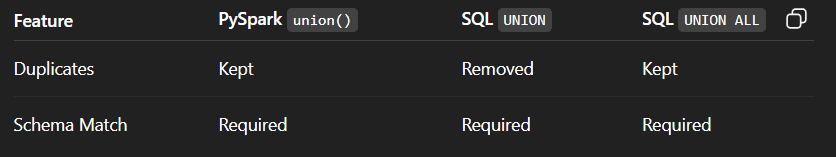

#### Creating Two DataFrames

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

# First DataFrame
data1 = [("James","Sales","NY",90000,34,10000),
         ("Michael","Sales","NY",86000,56,20000),
         ("Robert","Sales","CA",81000,30,23000),
         ("Maria","Finance","CA",90000,24,23000)]
columns = ["employee_name","department","state","salary","age","bonus"]

df = spark.createDataFrame(data1, schema=columns)

# Second DataFrame
data2 = [("James","Sales","NY",90000,34,10000),
         ("Maria","Finance","CA",90000,24,23000),
         ("Jen","Finance","NY",79000,53,15000),
         ("Jeff","Marketing","CA",80000,25,18000),
         ("Kumar","Marketing","NY",91000,50,21000)]

df2 = spark.createDataFrame(data2, schema=columns)


#### Union Example

In [ ]:
union_df = df.union(df2)
union_df.show(truncate=False)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



Removing Duplicates in union

In [ ]:
union_df = df.union(df2).distinct()
union_df.show(truncate=False)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
+-------------+----------+-----+------+---+-----+



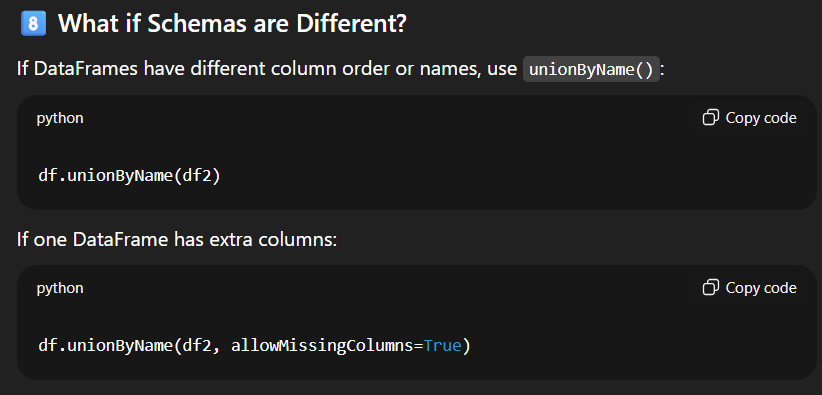

#### Union All Example

In [ ]:
unionall_df = df.unionAll(df2)
unionall_df.show(truncate=False)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|James        |Sales     |NY   |90000 |34 |10000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



Removing Duplicates in unionAll()

In [ ]:
unionall_df = df.unionAll(df2).distinct()
unionall_df.show(truncate=False)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
+-------------+----------+-----+------+---+-----+



## Window Functions

Window functions in PySpark allow you to perform operations across a group of rows related to the current row, without collapsing them into a single result (unlike groupBy).

They are useful for:

- Ranking rows within groups.

- Calculating cumulative metrics (running totals, averages).

- Comparing current row values with previous or next rows.

- Performing analytics within partitions.

### Types of Window Functions

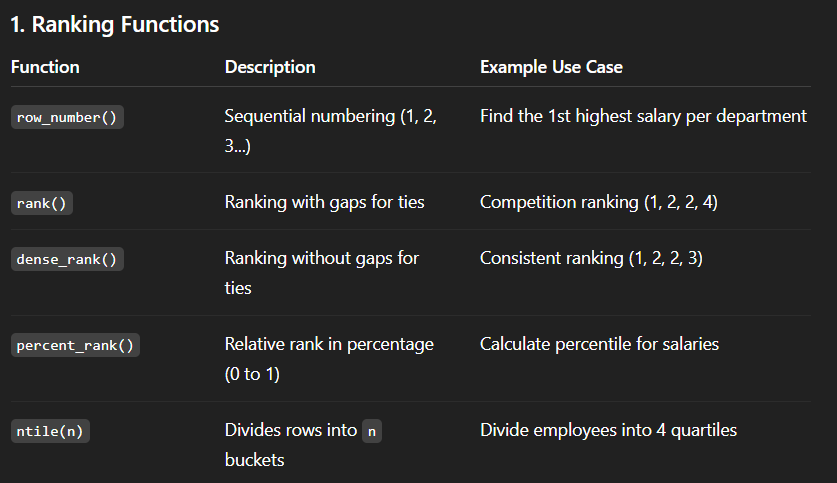

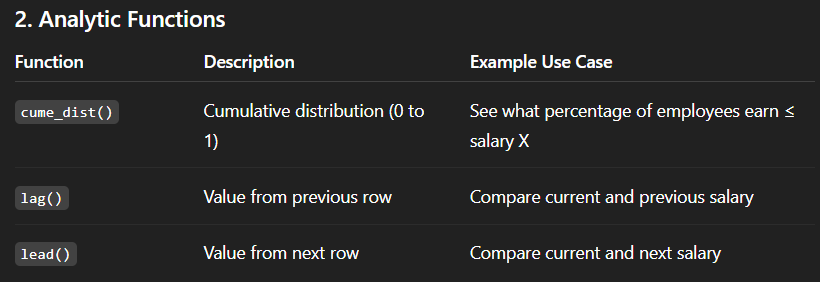

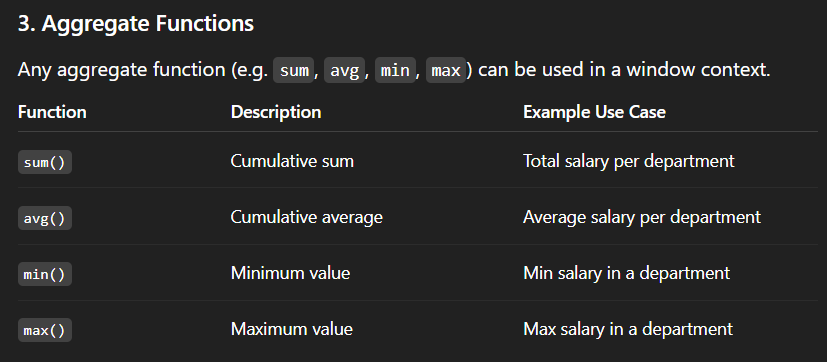

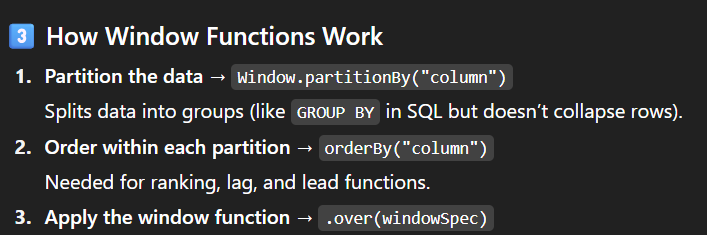

Creating DataFrame

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('WindowFunctions').getOrCreate()

data = [
    ("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
]
columns = ["employee_name", "department", "salary"]

df = spark.createDataFrame(data, schema=columns)
df.show()


+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|        James|     Sales|  3000|
|      Michael|     Sales|  4600|
|       Robert|     Sales|  4100|
|        Maria|   Finance|  3000|
|        James|     Sales|  3000|
|        Scott|   Finance|  3300|
|          Jen|   Finance|  3900|
|         Jeff| Marketing|  3000|
|        Kumar| Marketing|  2000|
|         Saif|     Sales|  4100|
+-------------+----------+------+



#### Ranking Functions

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, rank, dense_rank, percent_rank, ntile

windowSpec = Window.partitionBy("department").orderBy("salary")

#row number
df.withColumn("row_number", row_number().over(windowSpec)).show()
#we can do like this too
'''
df.withColumn("row_number", row_number().over(
    Window.partitionBy("department").orderBy("salary")
)).show()
'''

#rank
df.withColumn("rank", rank().over(windowSpec)).show()

#dense rank
df.withColumn("Dense_rank", dense_rank().over(windowSpec)).show()

#percent rank
df.withColumn("Percent_rank", percent_rank().over(windowSpec)).show()

# ntile
df.withColumn("Ntile", ntile(2).over(windowSpec)).show()


+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|        Maria|   Finance|  3000|         1|
|        Scott|   Finance|  3300|         2|
|          Jen|   Finance|  3900|         3|
|        Kumar| Marketing|  2000|         1|
|         Jeff| Marketing|  3000|         2|
|        James|     Sales|  3000|         1|
|        James|     Sales|  3000|         2|
|       Robert|     Sales|  4100|         3|
|         Saif|     Sales|  4100|         4|
|      Michael|     Sales|  4600|         5|
+-------------+----------+------+----------+

+-------------+----------+------+----+
|employee_name|department|salary|rank|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|   1|
|        Scott|   Finance|  3300|   2|
|          Jen|   Finance|  3900|   3|
|        Kumar| Marketing|  2000|   1|
|         Jeff| Marketing|  3000|   2|
|        James|     Sales|  3000|   1|
|        James|   

#### Analytic Functions

In [ ]:
from pyspark.sql.functions import cume_dist, lag, lead
#cume_dist
df.withColumn("cume_dist", cume_dist().over(windowSpec)).show()
#lag
df.withColumn("Lag", lag("salary", 2).over(windowSpec)).show()
#lead
df.withColumn("Lead", lead("salary",2).over(windowSpec)).show()

+-------------+----------+------+------------------+
|employee_name|department|salary|         cume_dist|
+-------------+----------+------+------------------+
|        Maria|   Finance|  3000|0.3333333333333333|
|        Scott|   Finance|  3300|0.6666666666666666|
|          Jen|   Finance|  3900|               1.0|
|        Kumar| Marketing|  2000|               0.5|
|         Jeff| Marketing|  3000|               1.0|
|        James|     Sales|  3000|               0.4|
|        James|     Sales|  3000|               0.4|
|       Robert|     Sales|  4100|               0.8|
|         Saif|     Sales|  4100|               0.8|
|      Michael|     Sales|  4600|               1.0|
+-------------+----------+------+------------------+

+-------------+----------+------+----+
|employee_name|department|salary| Lag|
+-------------+----------+------+----+
|        Maria|   Finance|  3000|NULL|
|        Scott|   Finance|  3300|NULL|
|          Jen|   Finance|  3900|3000|
|        Kumar| Marketi

#### Aggregate Functions

In [ ]:
from pyspark.sql.functions import col, avg, sum, min, max
windowSpecAgg = Window.partitionBy("department")
df.withColumn("avg_salary", avg(col("salary")).over(windowSpecAgg))\
  .withColumn("total_salary", sum(col("salary")).over(windowSpecAgg))\
  .withColumn("min_salary", min(col("salary")).over(windowSpecAgg))\
  .withColumn("max_salary", max(col("salary")).over(windowSpecAgg))\
  .show()

+-------------+----------+------+----------+------------+----------+----------+
|employee_name|department|salary|avg_salary|total_salary|min_salary|max_salary|
+-------------+----------+------+----------+------------+----------+----------+
|        Maria|   Finance|  3000|    3400.0|       10200|      3000|      3900|
|        Scott|   Finance|  3300|    3400.0|       10200|      3000|      3900|
|          Jen|   Finance|  3900|    3400.0|       10200|      3000|      3900|
|         Jeff| Marketing|  3000|    2500.0|        5000|      2000|      3000|
|        Kumar| Marketing|  2000|    2500.0|        5000|      2000|      3000|
|        James|     Sales|  3000|    3760.0|       18800|      3000|      4600|
|      Michael|     Sales|  4600|    3760.0|       18800|      3000|      4600|
|       Robert|     Sales|  4100|    3760.0|       18800|      3000|      4600|
|        James|     Sales|  3000|    3760.0|       18800|      3000|      4600|
|         Saif|     Sales|  4100|    376

## Date and Time Functions

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create SparkSession
spark = SparkSession.builder \
            .appName('SparkByExamples.com') \
            .getOrCreate()
data=[["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
df=spark.createDataFrame(data,["id","input"])
df.show()


+---+----------+
| id|     input|
+---+----------+
|  1|2020-02-01|
|  2|2019-03-01|
|  3|2021-03-01|
+---+----------+



#### current_date()

Use current_date() to get the current system date. By default, the data will be returned in yyyy-dd-mm format.

In [ ]:
df.select(current_date().alias("current date")).show(1)

+------------+
|current date|
+------------+
|  2025-08-04|
+------------+
only showing top 1 row



#### date_format()
The below example uses date_format() to parses the date and converts from yyyy-dd-mm to MM-dd-yyyy format.


In [ ]:
df.select(col("input"), date_format(col("input"), "MM-dd-yyyy").alias("date_format")).show()

+----------+-----------+
|     input|date_format|
+----------+-----------+
|2020-02-01| 02-01-2020|
|2019-03-01| 03-01-2019|
|2021-03-01| 03-01-2021|
+----------+-----------+



#### to_date()
Below example converts string in date format yyyy-MM-dd to a DateType yyyy-MM-dd using to_date(). You can also use this to convert into any specific format.

In [ ]:
df.select(col("input"),
    to_date(col("input"), "yyy-MM-dd").alias("to_date")
  ).show()

+----------+----------+
|     input|   to_date|
+----------+----------+
|2020-02-01|2020-02-01|
|2019-03-01|2019-03-01|
|2021-03-01|2021-03-01|
+----------+----------+



#### datediff()
The below example returns the difference between two dates using datediff().



In [ ]:
df.select(col("input"),
          datediff(current_date(), col("input")).alias("Date_difference")).show()

+----------+---------------+
|     input|Date_difference|
+----------+---------------+
|2020-02-01|           2011|
|2019-03-01|           2348|
|2021-03-01|           1617|
+----------+---------------+



#### months_between()
The below example returns the months between two dates using months_between().

In [ ]:
df.select(col("input"),
          months_between(current_date(), col("input")).alias("month_between")
          ).show()

+----------+-------------+
|     input|month_between|
+----------+-------------+
|2020-02-01|  66.09677419|
|2019-03-01|  77.09677419|
|2021-03-01|  53.09677419|
+----------+-------------+



#### trunc()
The below example truncates the date at a specified unit using trunc().



In [ ]:
df.select(col("input"),
          trunc(col("input"),"Month").alias("Month_trunc"),
          trunc(col("input"), "Year").alias("Year_Trunc"),
          ).show()


+----------+-----------+----------+
|     input|Month_trunc|Year_Trunc|
+----------+-----------+----------+
|2020-02-01| 2020-02-01|2020-01-01|
|2019-03-01| 2019-03-01|2019-01-01|
|2021-03-01| 2021-03-01|2021-01-01|
+----------+-----------+----------+



#### add_months() , date_add(), date_sub()

In [ ]:
df.select(col("input"),
          add_months(col("input"),3).alias("add_3_months"),
          add_months(col("input"),-3).alias("sub 3 months"),
          date_add(col("input"), 4).alias("date add"),
          date_sub(col("input"),4).alias("date sub")).show()

+----------+------------+------------+----------+----------+
|     input|add_3_months|sub 3 months|  date add|  date sub|
+----------+------------+------------+----------+----------+
|2020-02-01|  2020-05-01|  2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|  2019-06-01|  2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|  2021-06-01|  2020-12-01|2021-03-05|2021-02-25|
+----------+------------+------------+----------+----------+



#### year(), month(), month(),next_day(), weekofyear()


In [ ]:
df.select(col("input"),
          year(col("input")).alias("year"),
          month(col("input")).alias("month"),
          next_day(col("input"),"Sunday").alias("Next day"),
          weekofyear(col("input")).alias("week of year")
          ).show()

+----------+----+-----+----------+------------+
|     input|year|month|  Next day|week of year|
+----------+----+-----+----------+------------+
|2020-02-01|2020|    2|2020-02-02|           5|
|2019-03-01|2019|    3|2019-03-03|           9|
|2021-03-01|2021|    3|2021-03-07|           9|
+----------+----+-----+----------+------------+



#### dayofweek(), dayofmonth(), dayofyear()

1) dayofweek
- Returns the day of the week as an integer.

- Range: 1 (Sunday) → 7 (Saturday).

- Use Case: Helps identify weekdays, weekends, or perform weekday-based grouping.

2) dayofmonth
- Returns the day of the month from the date.
- Range: 1 → 31 (depends on the month).
- Use Case: Useful for identifying billing dates, month-start or month-end operations.

3) dayofyear
- Returns the day number within the year.
- Range: 1 → 365 (or 366 for leap years).
- Use Case: Helps in seasonal or yearly trend analysis.

In [ ]:
df.select(col("input"),
          dayofweek(col("input")).alias("day_of_week"),
          dayofmonth(col("input")).alias("day_of_month"),
          dayofyear(col("input")).alias("day_of_year")
          ).show()

+----------+-----------+------------+-----------+
|     input|day_of_week|day_of_month|day_of_year|
+----------+-----------+------------+-----------+
|2020-02-01|          7|           1|         32|
|2019-03-01|          6|           1|         60|
|2021-03-01|          2|           1|         60|
+----------+-----------+------------+-----------+



#### current_timestamp()

In PySpark, the function current_timestamp() is used to retrieve the current system timestamp (date and time) at the moment the query is executed.

In [ ]:
data=[["1","02-01-2020 11 01 19 06"],["2","03-01-2019 12 01 19 406"],["3","03-01-2021 12 01 19 406"]]
df2=spark.createDataFrame(data,["id","input"])
df2.show(truncate=False)

+---+-----------------------+
|id |input                  |
+---+-----------------------+
|1  |02-01-2020 11 01 19 06 |
|2  |03-01-2019 12 01 19 406|
|3  |03-01-2021 12 01 19 406|
+---+-----------------------+



In [ ]:
df2.select(current_timestamp().alias("current_timestamp")).show(1, truncate=False)

+--------------------------+
|current_timestamp         |
+--------------------------+
|2025-08-04 13:19:35.388602|
+--------------------------+
only showing top 1 row



#### to_timestamp()
Converts string timestamp to Timestamp type format.



In [ ]:
df2.select(col("input"),
           to_timestamp(col("input"), "MM-dd-yyyy HH mm ss SSS").alias("to_timestamp")
           ).show(truncate=False)

+-----------------------+-----------------------+
|input                  |to_timestamp           |
+-----------------------+-----------------------+
|02-01-2020 11 01 19 06 |2020-02-01 11:01:19.06 |
|03-01-2019 12 01 19 406|2019-03-01 12:01:19.406|
|03-01-2021 12 01 19 406|2021-03-01 12:01:19.406|
+-----------------------+-----------------------+



#### hour(), Minute() and second()

In [ ]:
data=[["1","2020-02-01 11:01:19.06"],["2","2019-03-01 12:01:19.406"],["3","2021-03-01 12:01:19.406"]]
df3=spark.createDataFrame(data,["id","input"])

df3.select(col("input"),
    hour(col("input")).alias("hour"),
    minute(col("input")).alias("minute"),
    second(col("input")).alias("second")
  ).show(truncate=False)

+-----------------------+----+------+------+
|input                  |hour|minute|second|
+-----------------------+----+------+------+
|2020-02-01 11:01:19.06 |11  |1     |19    |
|2019-03-01 12:01:19.406|12  |1     |19    |
|2021-03-01 12:01:19.406|12  |1     |19    |
+-----------------------+----+------+------+



#### Unix Time (Epoch Time)

Unix Time (Epoch Time) represents the number of seconds passed since 1970-01-01 00:00:00 UTC.

- It is commonly used in Unix-like operating systems.

- No fractions of a second (SSS) are supported in traditional Unix time.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

inputData = [("2019-07-01 12:01:19", "07-01-2019 12:01:19", "07-01-2019")]
columns = ["timestamp_1", "timestamp_2", "timestamp_3"]

df = spark.createDataFrame(data=inputData, schema=columns)
df.printSchema()
df.show(truncate=False)

root
 |-- timestamp_1: string (nullable = true)
 |-- timestamp_2: string (nullable = true)
 |-- timestamp_3: string (nullable = true)

+-------------------+-------------------+-----------+
|timestamp_1        |timestamp_2        |timestamp_3|
+-------------------+-------------------+-----------+
|2019-07-01 12:01:19|07-01-2019 12:01:19|07-01-2019 |
+-------------------+-------------------+-----------+



unix_timestamp() – Date/Timestamp → Unix Time

Converts a date or timestamp column to Unix timestamp (in seconds).



```
unix_timestamp()                     # Returns current Unix timestamp (seconds)
unix_timestamp(column)               # Converts a timestamp column
unix_timestamp(column, format)       # Converts with a custom date format

```



In [ ]:
from pyspark.sql.functions import *

df2 = df.select(
    unix_timestamp(col("timestamp_1")).alias("timestamp_1"),
    unix_timestamp(col("timestamp_2"), "MM-dd-yyyy HH:mm:ss").alias("timestamp_2"),
    unix_timestamp(col("timestamp_3"), "MM-dd-yyyy").alias("timestamp_3"),
    unix_timestamp().alias("timestamp_4")  # Current Unix timestamp
)

df2.printSchema()
df2.show(truncate=False)


root
 |-- timestamp_1: long (nullable = true)
 |-- timestamp_2: long (nullable = true)
 |-- timestamp_3: long (nullable = true)
 |-- timestamp_4: long (nullable = true)

+-----------+-----------+-----------+-----------+
|timestamp_1|timestamp_2|timestamp_3|timestamp_4|
+-----------+-----------+-----------+-----------+
|1561982479 |1561982479 |1561939200 |1754314307 |
+-----------+-----------+-----------+-----------+



#### from_unixtime() – Unix Time → Date/Timestamp

Converts Unix timestamp seconds to a readable date or timestamp.



```
from_unixtime(column)                     # Default format: yyyy-MM-dd HH:mm:ss
from_unixtime(column, format)             # Custom format

```




In [ ]:
df3 = df2.select(
    from_unixtime(col("timestamp_1")).alias("timestamp_1"),
    from_unixtime(col("timestamp_2"), "MM-dd-yyyy HH:mm:ss").alias("timestamp_2"),
    from_unixtime(col("timestamp_3"), "MM-dd-yyyy").alias("timestamp_3"),
    from_unixtime(col("timestamp_4")).alias("timestamp_4")
)

df3.printSchema()
df3.show(truncate=False)


root
 |-- timestamp_1: string (nullable = true)
 |-- timestamp_2: string (nullable = true)
 |-- timestamp_3: string (nullable = true)
 |-- timestamp_4: string (nullable = true)

+-------------------+-------------------+-----------+-------------------+
|timestamp_1        |timestamp_2        |timestamp_3|timestamp_4        |
+-------------------+-------------------+-----------+-------------------+
|2019-07-01 12:01:19|07-01-2019 12:01:19|07-01-2019 |2025-08-04 13:32:41|
+-------------------+-------------------+-----------+-------------------+



#### date_format

The date_format() function in PySpark is a powerful tool for transforming, formatting date columns and converting date to string within a DataFrame. This function allows you to convert date and timestamp columns into a specified string format, providing flexibility for various date manipulation tasks.

In [ ]:
df=spark.createDataFrame([["1"]],["id"])
df.select(current_date().alias("Current_date"),
          date_format(current_date(), "yyyy MM dd").alias("yyyy MM dd"),
          date_format(current_timestamp(), "MM/dd/yyyy hh:mm").alias("MM/dd/yyyy hh:mm"),
          date_format(current_timestamp(), "yyyy MMM dd").alias("yyyy MMM dd"),
          date_format(current_timestamp(), "yyyy MMMM dd E").alias("yyyy MMMM dd E")
          ).show()

+------------+----------+----------------+-----------+------------------+
|Current_date|yyyy MM dd|MM/dd/yyyy hh:mm|yyyy MMM dd|    yyyy MMMM dd E|
+------------+----------+----------------+-----------+------------------+
|  2025-08-04|2025 08 04|08/04/2025 02:02|2025 Aug 04|2025 August 04 Mon|
+------------+----------+----------------+-----------+------------------+



Using Sql

In [ ]:
spark.sql("select current_date() as current_date, "+
      "date_format(current_timestamp(),'yyyy MM dd') as yyyy_MM_dd, "+
      "date_format(current_timestamp(),'MM/dd/yyyy hh:mm') as MM_dd_yyyy, "+
      "date_format(current_timestamp(),'yyyy MMM dd') as yyyy_MMMM_dd, "+
      "date_format(current_timestamp(),'yyyy MMMM dd E') as yyyy_MMMM_dd_E").show()

+------------+----------+----------------+------------+------------------+
|current_date|yyyy_MM_dd|      MM_dd_yyyy|yyyy_MMMM_dd|    yyyy_MMMM_dd_E|
+------------+----------+----------------+------------+------------------+
|  2025-08-04|2025 08 04|08/04/2025 02:04| 2025 Aug 04|2025 August 04 Mon|
+------------+----------+----------------+------------+------------------+



# RDD

## Transformation

### map()

map() is a transformation in PySpark’s RDD (Resilient Distributed Dataset) that applies a function to each element in the RDD and returns a new RDD.

📌 Think of it like:
> “For every element in this dataset, apply this function and give me the results.”



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = ["Project",
"Gutenberg’s",
"Alice’s",
"Adventures",
"in",
"Wonderland",
"Project",
"Gutenberg’s",
"Adventures",
"in",
"Wonderland",
"Project",
"Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)

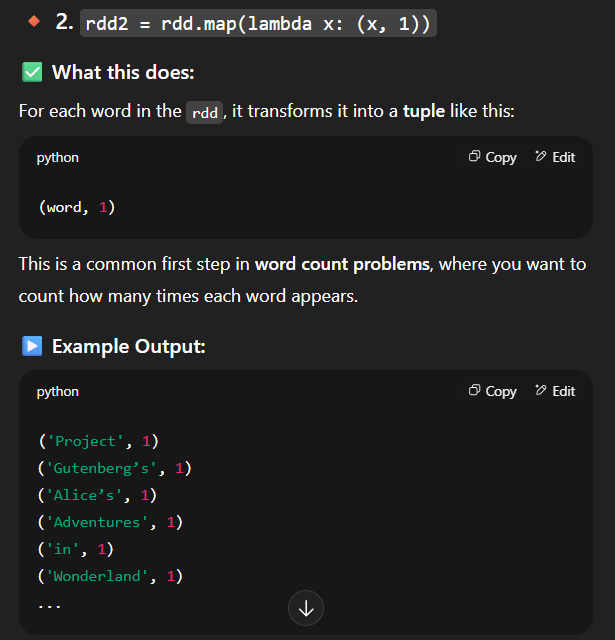

In [ ]:
rdd2 = rdd.map(lambda x: (x,1))
rdd2.collect()

[('Project', 1),
 ('Gutenberg’s', 1),
 ('Alice’s', 1),
 ('Adventures', 1),
 ('in', 1),
 ('Wonderland', 1),
 ('Project', 1),
 ('Gutenberg’s', 1),
 ('Adventures', 1),
 ('in', 1),
 ('Wonderland', 1),
 ('Project', 1),
 ('Gutenberg’s', 1)]

#### Mapping over a DataFrame RDD

In [ ]:
data = [('James','Smith','M',30),
        ('Anna','Rose','F',41),
        ('Robert','Williams','M',62)]
columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema=columns)

Convert into rdd and map it

In [ ]:
rdd2 = df.rdd.map(lambda x:(x[0]+","+x[1], x[2], x[3]*2))
rdd2.collect()

[('James,Smith', 'M', 60),
 ('Anna,Rose', 'F', 82),
 ('Robert,Williams', 'M', 124)]

#### Using Column Names

Instead of using index positions like x[0], you can refer to fields by name:

In [ ]:
rdd3 = df.rdd.map(lambda x:(x["firstname"]+" " + x["lastname"], x["gender"], x["salary"]*2))
rdd3.collect()

[('James Smith', 'M', 60),
 ('Anna Rose', 'F', 82),
 ('Robert Williams', 'M', 124)]

Or using dot notation:

In [ ]:
rdd3 = df.rdd.map(lambda x:(x.firstname + " " + x.lastname, x.gender, x.salary * 2))
rdd3.collect()

[('James Smith', 'M', 60),
 ('Anna Rose', 'F', 82),
 ('Robert Williams', 'M', 124)]

These both do the same thing, but are more readable and safer than indexing.

#### Using a Custom Function

In [ ]:
def func1(x):
  firstName = x.firstname
  lastName = x.lastname
  name = firstName + " " + lastName
  gender = x.gender.lower()
  salary = x.salary*2
  return(name, gender, salary)
rdd3 = df.rdd.map(func1).toDF().show()

+---------------+---+---+
|             _1| _2| _3|
+---------------+---+---+
|    James Smith|  m| 60|
|      Anna Rose|  f| 82|
|Robert Williams|  m|124|
+---------------+---+---+



### flatMap()

flatMap() is a transformation in PySpark that:

✅ Applies a function to each element in the RDD (like map)

✅ But flattens the results (merges all lists into a single list).

🔸 Difference from map():
- map() → returns one element per input

- flatMap() → returns zero, one, or multiple elements per input

In [ ]:
rdd = spark.sparkContext.parallelize(["Hello World", "This is Spark"])
rdd2 = rdd.flatMap(lambda x: x.split(" "))
for element in rdd2.collect():
  print(element)

Hello
World
This
is
Spark


Without for loop (it comes with a list)

In [ ]:
rdd = spark.sparkContext.parallelize(["Hello World", "This is Spark"])
rdd2 = rdd.flatMap(lambda x: x.split(" "))
rdd2.collect()

['Hello', 'World', 'This', 'is', 'Spark']

#### Same example using map() instead

In [ ]:
rdd2 = rdd.map(lambda x: x.split(" "))
for element in rdd2.collect():
    print(element)

['Hello', 'World']
['This', 'is', 'Spark']


In [ ]:
rdd2.collect()

[['Hello', 'World'], ['This', 'is', 'Spark']]

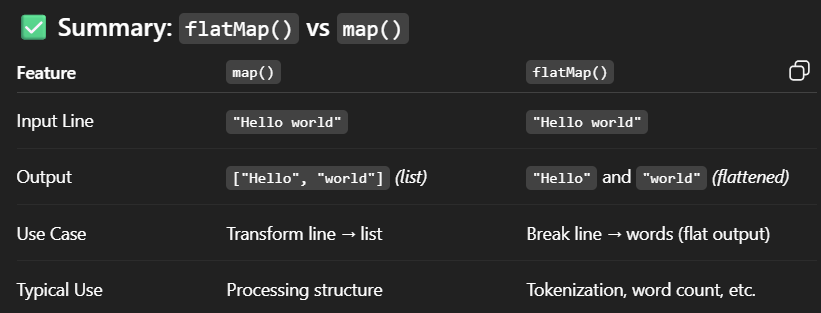

#### reduceByKey()

reduceByKey() is used only on Pair RDDs (i.e., RDDs of the form (key, value)).

It groups all values with the same key, then applies the given function (e.g., sum, max, min, etc.) to reduce those grouped values to a single value.

In [ ]:
rdd = spark.sparkContext.parallelize(["Hello world", "Hello Spark", "world of Spark"])
rdd2 = rdd.flatMap(lambda line: line.split(" "))
rdd3 = rdd2.map(lambda word: (word, 1))
rdd4 = rdd3.reduceByKey(lambda a,b: a+b)
for word in rdd4.collect():
  print(word)



('Hello', 2)
('world', 2)
('Spark', 2)
('of', 1)


Working of Word Count Example Step-by-Step

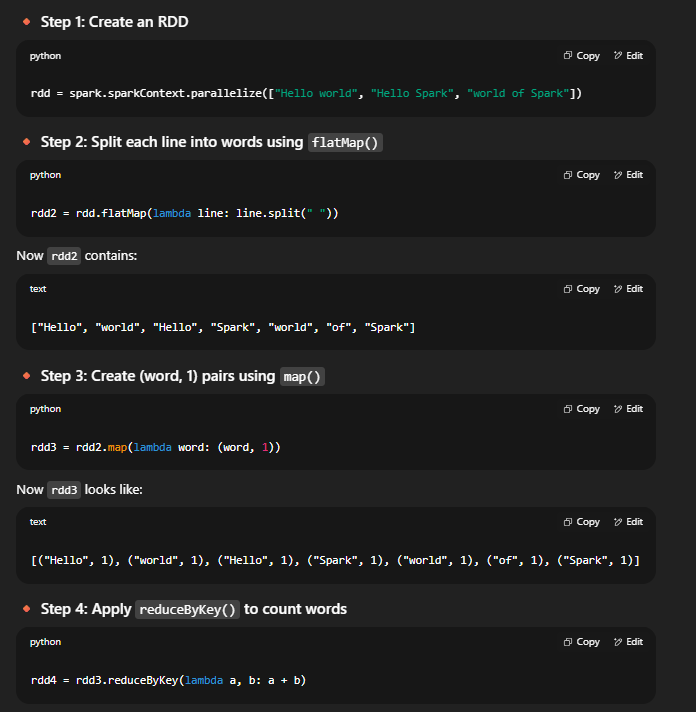

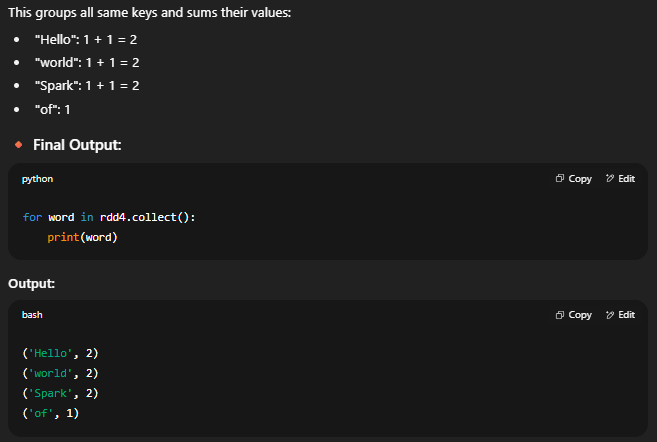

#### sortByKey()

sortByKey() sorts an RDD of key-value pairs by key (ascending by default).

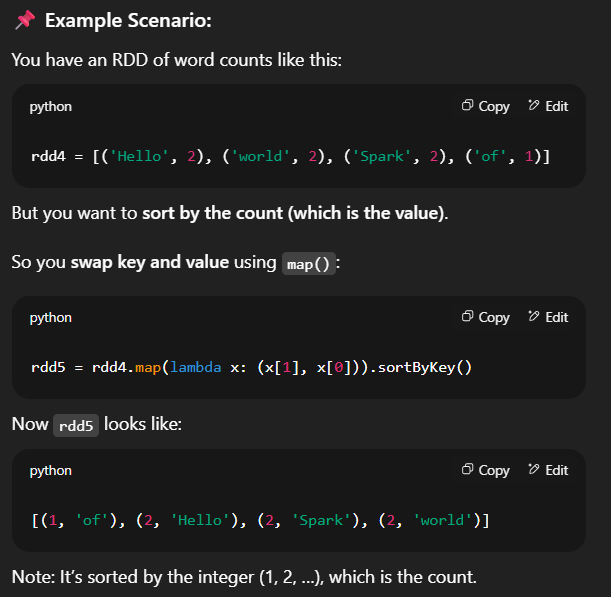

In [ ]:
rdd5 = rdd4.map(lambda x: (x[1], x[0])).sortByKey()
rdd5.collect()

[(1, 'of'), (2, 'Hello'), (2, 'world'), (2, 'Spark')]

#### filter()

filter() keeps only the elements for which the condition is True.

In [ ]:
rdd6 = rdd5.filter(lambda x: 'o' in x[1])
rdd6.collect()

[(1, 'of'), (2, 'Hello'), (2, 'world')]

This filters elements where the second part of the tuple (the word) contains the letter 'o'

#### mapPartitions()

mapPartitions() is a narrow transformation used on RDDs to apply a function once per partition, instead of once per row (like map()).

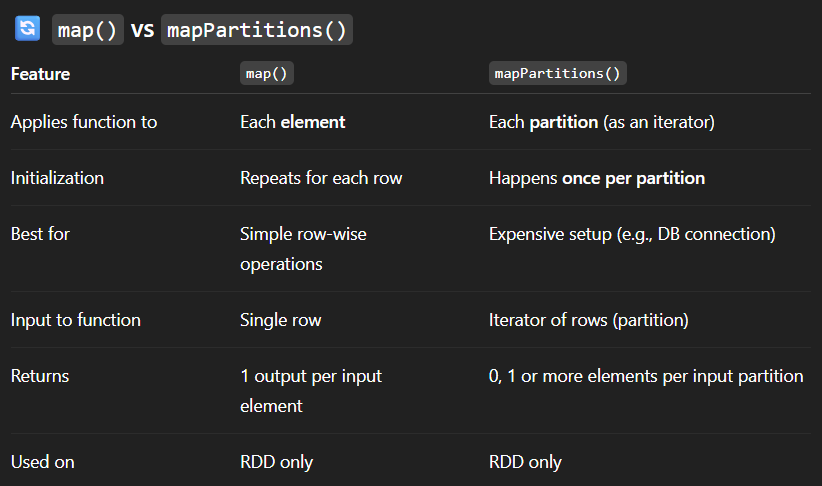

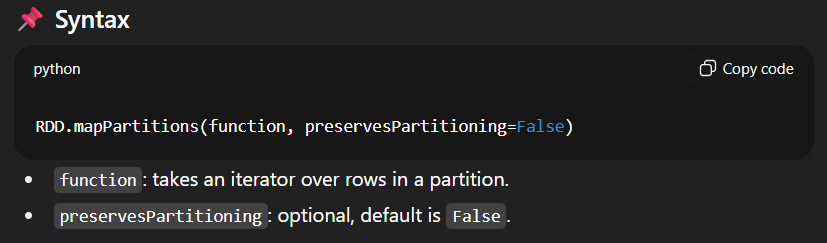

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('mapPartitionsDemo').getOrCreate()

data = [
    ('James','Smith','M',3000),
    ('Anna','Rose','F',4100),
    ('Robert','Williams','M',6200)
]
columns = ["firstname", "lastname", "gender", "salary"]
df = spark.createDataFrame(data, schema=columns)
df.show()


+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+



mapPartitions() with yield

In [ ]:
def reformat(partitionData):
  for row in partitionData:
    yield[row.firstname + ' ' + row.lastname, row.salary*0.10]
df2 = df.rdd.mapPartitions(reformat).toDF(["name", "bonus"])
df2.show()

+---------------+-----+
|           name|bonus|
+---------------+-----+
|    James Smith|300.0|
|      Anna Rose|410.0|
|Robert Williams|620.0|
+---------------+-----+



 Without yield, using return iter(...)

In [ ]:
def reformat2(partitionData):
  updated = []
  for row in partitionData:
    name = row.firstname + ' ' + row.lastname
    bonus = row.salary * 0.10
    updated.append([name, bonus])
  return iter(updated)
df2 = df.rdd.mapPartitions(reformat2).toDF(["name", "bonus"])
df2.show()

+---------------+-----+
|           name|bonus|
+---------------+-----+
|    James Smith|300.0|
|      Anna Rose|410.0|
|Robert Williams|620.0|
+---------------+-----+



⚠️ Why and When to Use mapPartitions()
Use mapPartitions() when:

You need to reuse expensive operations like:

- Setting up a database connection

- Initializing a model

- Opening a file or network connection

You want better performance than repeatedly doing it per row (as in map()).

#### repartition()

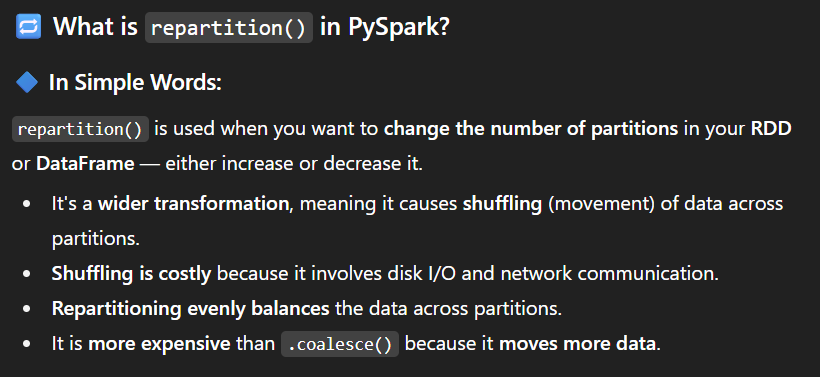

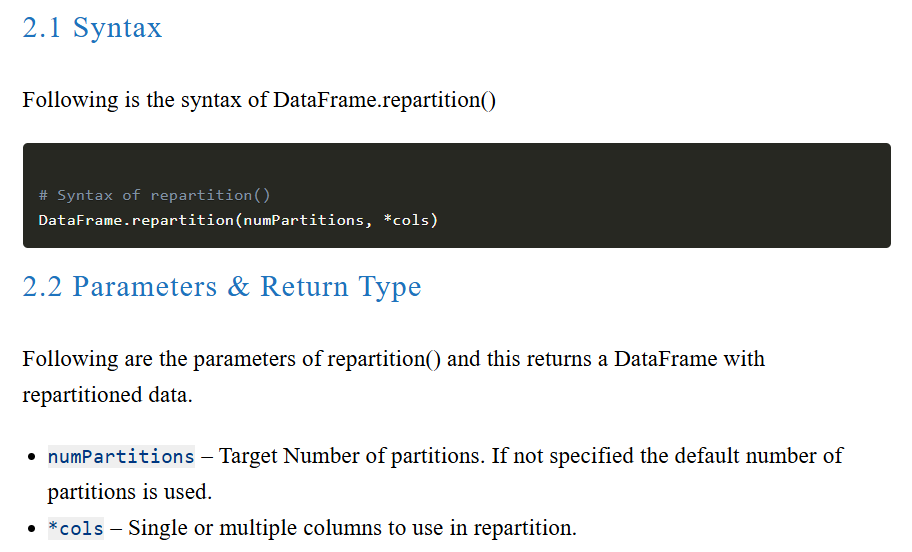

In [ ]:
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession.builder.appName('SparkByExamples.com') \
        .master("local[5]").getOrCreate()

# Create PySpark DataFrame
simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.show()

# Write to CSV file
df.write.mode("overwrite").csv("partition.csv")

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        Raman|   Finance|   CA| 99000| 40|24000|
|        Scott|   Finance|   NY| 83000| 36|19000|
|          Jen|   Finance|   NY| 79000| 53|15000|
|         Jeff| Marketing|   CA| 80000| 25|18000|
|        Kumar| Marketing|   NY| 91000| 50|21000|
+-------------+----------+-----+------+---+-----+



Repartition by Number

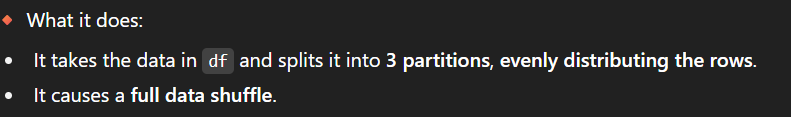

In [ ]:
df2 = df.repartition(3)
print(df2.rdd.getNumPartitions())
df2.write.mode("overwrite").csv("partition.csv")

3


Repartition by Column

What it does:

- Repartitions the data by values of the state column.

- Rows with the same state go to the same partition.

- Internally, it may use a hash partitioner.

In [ ]:
df2 = df.repartition("state")
print(df2.rdd.getNumPartitions())
df2.write.mode("overwrite").csv("partition.csv")

1


Repartition by Multiple Columns

What it does:

- Similar to above, but groups by combinations of state and department.

- Ensures rows with the same state + department go to the same partition.


In [ ]:
df2 = df.repartition("state", "department")
print(df2.rdd.getNumPartitions())
df2.write.mode("overwrite").csv("partition.csv")

1


repartition by range

In [ ]:
rdd1 = spark.sparkContext.parallelize(range(0, 25), 6)
rdd2 = rdd1.repartition(4)
print("Repartition size : "+str(rdd2.getNumPartitions()))

Repartition size : 4


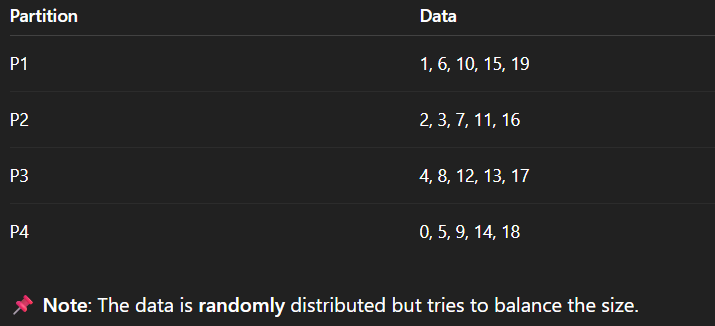